# Chapter 4: Training Models

**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow**

This comprehensive notebook covers the fundamental concepts of training machine learning models, focusing on linear models and their variations. We'll explore both theoretical foundations and practical implementations.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Linear Regression](#linear-regression)
3. [Gradient Descent](#gradient-descent)
4. [Polynomial Regression](#polynomial-regression)
5. [Learning Curves](#learning-curves)
6. [Regularized Linear Models](#regularized-models)
7. [Logistic Regression](#logistic-regression)
8. [Softmax Regression](#softmax-regression)
9. [Exercises and Solutions](#exercises)

---

## 1. Setup and Imports

First, let's set up our environment with all necessary imports and configurations for Google Colab.

In [53]:
# Install required packages for Google Colab
!pip install scikit-learn matplotlib numpy pandas seaborn

# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_regression
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    LogisticRegression, SGDRegressor
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Setup complete! Ready to explore training models.")

Setup complete! Ready to explore training models.


## Introduction to Training Models

Training a machine learning model means finding the optimal parameters that best fit the training data. In this chapter, we'll explore various approaches to training linear models, each with different computational complexities and use cases.

**Key Learning Objectives:**
- Understand different methods for training linear regression models
- Learn about gradient descent algorithms and their variants
- Explore regularization techniques to prevent overfitting
- Master logistic regression for classification tasks
- Implement softmax regression for multiclass classification

## 2. Linear Regression

Linear regression makes predictions by computing a weighted sum of input features plus a bias term (intercept).

### Mathematical Foundation

**Equation 4-1: Linear Regression Model Prediction**
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$$

**Equation 4-2: Vectorized Form**
$$\hat{y} = h_\theta(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}$$

Where:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $\theta_j$ is the $j^{th}$ model parameter
- $\boldsymbol{\theta}$ is the parameter vector
- $\mathbf{x}$ is the feature vector (with $x_0 = 1$ for the bias term)

### Cost Function

We use Mean Squared Error (MSE) as our cost function:

**Equation 4-3: MSE Cost Function**
$$\text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\boldsymbol{\theta}^T\mathbf{x}^{(i)} - y^{(i)})^2$$

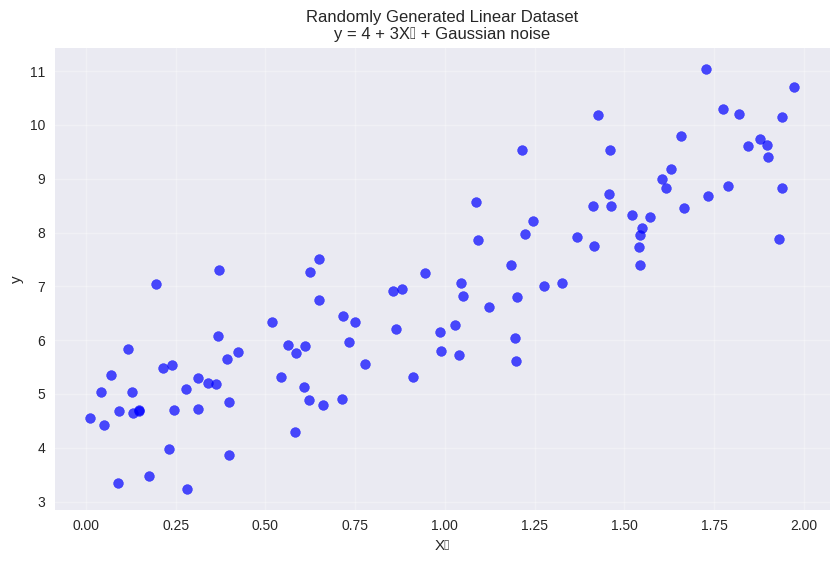

Dataset shape: X=(100, 1), y=(100, 1)
True parameters: θ₀=4, θ₁=3


In [54]:
# Generate sample linear data as shown in the book
# This creates data following y = 4 + 3*X + noise
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 instances, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with Gaussian noise

# Visualize the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='blue', s=50)
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Randomly Generated Linear Dataset\ny = 4 + 3X₁ + Gaussian noise')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"True parameters: θ₀=4, θ₁=3")

### The Normal Equation

The Normal Equation provides a closed-form solution to find the optimal parameters:

**Equation 4-4: Normal Equation**
$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

This directly computes the parameter vector that minimizes the cost function.

**Computational Complexity:**
- Time complexity: O(n²⁴) to O(n³) for matrix inversion
- Space complexity: O(n²) for storing X^T X
- Linear with respect to number of instances: O(m)

In [55]:
# Implement Normal Equation manually
# Add bias term (x₀ = 1) to each instance
X_b = np.c_[np.ones((100, 1)), X]  # Add column of 1s for bias term

# Apply Normal Equation: θ = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Normal Equation Results:")
print(f"Estimated parameters: θ₀={theta_best[0][0]:.3f}, θ₁={theta_best[1][0]:.3f}")
print(f"True parameters: θ₀=4.000, θ₁=3.000")
print(f"Parameter estimation error: θ₀ error={abs(theta_best[0][0]-4):.3f}, θ₁ error={abs(theta_best[1][0]-3):.3f}")

# Make predictions using our estimated parameters
X_new = np.array([[0], [2]])  # Test with X=0 and X=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta_best)

print(f"\nPredictions:")
print(f"X=0: ŷ={y_predict[0][0]:.3f} (expected ≈ 4)")
print(f"X=2: ŷ={y_predict[1][0]:.3f} (expected ≈ 10)")

Normal Equation Results:
Estimated parameters: θ₀=4.215, θ₁=2.770
True parameters: θ₀=4.000, θ₁=3.000
Parameter estimation error: θ₀ error=0.215, θ₁ error=0.230

Predictions:
X=0: ŷ=4.215 (expected ≈ 4)
X=2: ŷ=9.755 (expected ≈ 10)


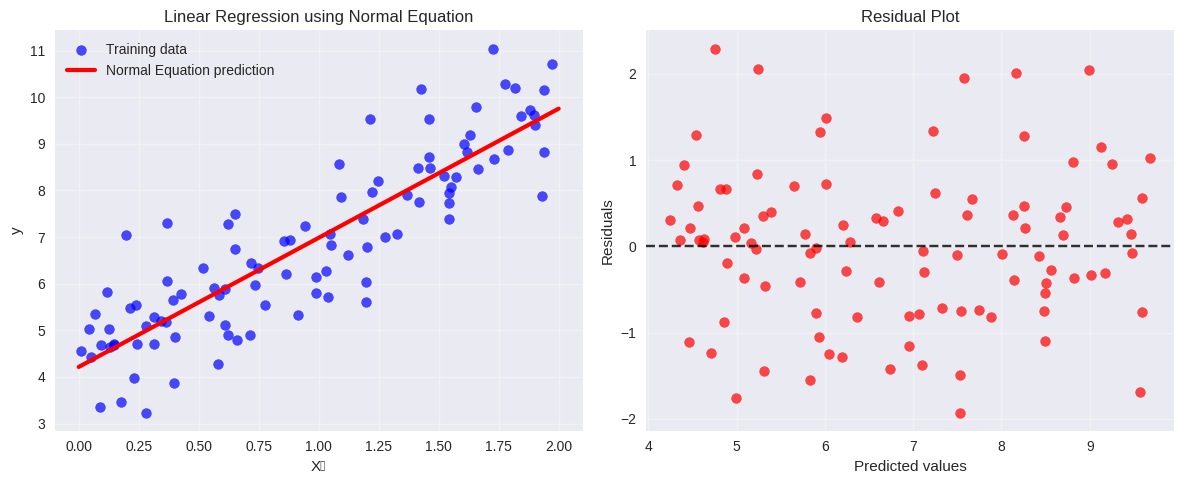

Mean Squared Error: 0.8066


In [56]:
# Visualize the Normal Equation results
plt.figure(figsize=(12, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, color='blue', s=50, label='Training data')
plt.plot(X_new, y_predict, 'r-', linewidth=3, label='Normal Equation prediction')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Linear Regression using Normal Equation')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (prediction errors)
plt.subplot(1, 2, 2)
y_pred_all = X_b.dot(theta_best)
residuals = y - y_pred_all
plt.scatter(y_pred_all, residuals, alpha=0.7, color='red', s=50)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate MSE
mse = np.mean(residuals**2)
print(f"Mean Squared Error: {mse:.4f}")

In [57]:
# Compare with scikit-learn's LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Scikit-Learn LinearRegression Results:")
print(f"Intercept (θ₀): {lin_reg.intercept_[0]:.3f}")
print(f"Coefficient (θ₁): {lin_reg.coef_[0][0]:.3f}")

# Make predictions
X_new = np.array([[0], [2]])  # Test with X=0 and X=2
y_predict_sklearn = lin_reg.predict(X_new)
print(f"\nPredictions (same as manual implementation):")
print(f"X=0: ŷ={y_predict_sklearn[0][0]:.3f}")
print(f"X=2: ŷ={y_predict_sklearn[1][0]:.3f}")

# Verify they match our manual implementation
print(f"\nParameters match: {np.allclose(theta_best.flatten(), [lin_reg.intercept_[0], lin_reg.coef_[0][0]])}")

Scikit-Learn LinearRegression Results:
Intercept (θ₀): 4.215
Coefficient (θ₁): 2.770

Predictions (same as manual implementation):
X=0: ŷ=4.215
X=2: ŷ=9.755

Parameters match: True


### SVD Approach

Scikit-Learn's `LinearRegression` class uses Singular Value Decomposition (SVD) which is more numerically stable than the Normal Equation, especially when dealing with singular matrices.

**Mathematical Background:**
- SVD decomposes matrix X into: $\mathbf{X} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$
- Pseudoinverse: $\mathbf{X}^+ = \mathbf{V}\boldsymbol{\Sigma}^+\mathbf{U}^T$
- Solution: $\hat{\boldsymbol{\theta}} = \mathbf{X}^+\mathbf{y}$

**Advantages of SVD:**
- Handles singular matrices (when X^T X is not invertible)
- More numerically stable
- Time complexity: O(n²) vs O(n³) for Normal Equation

In [58]:
# Demonstrate SVD approach using NumPy
# Using least squares solver (which uses SVD internally)
theta_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

print("SVD-based Solution (using np.linalg.lstsq):")
print(f"Parameters: θ₀={theta_svd[0][0]:.6f}, θ₁={theta_svd[1][0]:.6f}")
print(f"Residuals sum of squares: {residuals[0]:.6f}")
print(f"Matrix rank: {rank}")
print(f"Singular values: {s}")

# Using pseudoinverse directly
theta_pinv = np.linalg.pinv(X_b).dot(y)
print(f"\nPseudoinverse solution: θ₀={theta_pinv[0][0]:.6f}, θ₁={theta_pinv[1][0]:.6f}")

# All methods should give the same result
print(f"\nAll methods match: {np.allclose(theta_best, theta_svd) and np.allclose(theta_best, theta_pinv)}")

SVD-based Solution (using np.linalg.lstsq):
Parameters: θ₀=4.215096, θ₁=2.770113
Residuals sum of squares: 80.658456
Matrix rank: 2
Singular values: [14.37020392  4.11961067]

Pseudoinverse solution: θ₀=4.215096, θ₁=2.770113

All methods match: True


## 3. Gradient Descent

Gradient Descent is an iterative optimization algorithm that finds optimal parameters by following the negative gradient of the cost function.

### Mathematical Foundation

**Core Idea:** Move in the direction of steepest descent to minimize the cost function.

**Equation 4-5: Partial Derivatives**
$$\frac{\partial}{\partial\theta_j}\text{MSE}(\boldsymbol{\theta}) = \frac{2}{m}\sum_{i=1}^{m}(\boldsymbol{\theta}^T\mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$$

**Equation 4-6: Gradient Vector**
$$\nabla_\theta\text{MSE}(\boldsymbol{\theta}) = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$$

**Equation 4-7: Gradient Descent Step**
$$\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta\nabla_\theta\text{MSE}(\boldsymbol{\theta})$$

Where $\eta$ is the learning rate hyperparameter.

### Batch Gradient Descent

Batch Gradient Descent uses the entire training set to compute gradients at each step.

**Characteristics:**
- Uses full training set for each gradient computation
- Guaranteed to converge to global minimum for convex functions
- Computationally expensive for large datasets
- Smooth convergence path

In [59]:
# Implement Batch Gradient Descent from scratch
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, tolerance=1e-6):
    """
    Implement Batch Gradient Descent for Linear Regression

    Parameters:
    - X: Feature matrix (with bias term)
    - y: Target values
    - learning_rate: Step size for parameter updates
    - n_iterations: Maximum number of iterations
    - tolerance: Convergence criterion

    Returns:
    - theta: Optimized parameters
    - cost_history: Cost function values during training
    - theta_history: Parameter values during training
    """
    m = len(X)  # Number of training examples
    n = X.shape[1]  # Number of features (including bias)

    # Initialize parameters randomly
    theta = np.random.randn(n, 1)

    # Track progress
    cost_history = []
    theta_history = []

    for iteration in range(n_iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Calculate cost (MSE)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)
        theta_history.append(theta.copy())

        # Calculate gradients
        gradients = (2/m) * X.T.dot(predictions - y)

        # Check for convergence
        if np.linalg.norm(gradients) < tolerance:
            print(f"Converged after {iteration} iterations")
            break

        # Update parameters
        theta = theta - learning_rate * gradients

    return theta, cost_history, theta_history

# Apply Batch Gradient Descent
eta = 0.1  # Learning rate
n_iterations = 1000

theta_gd, cost_history, theta_history = batch_gradient_descent(
    X_b, y, learning_rate=eta, n_iterations=n_iterations
)

print("Batch Gradient Descent Results:")
print(f"Final parameters: θ₀={theta_gd[0][0]:.6f}, θ₁={theta_gd[1][0]:.6f}")
print(f"Normal Equation:      θ₀={theta_best[0][0]:.6f}, θ₁={theta_best[1][0]:.6f}")
print(f"Parameters match Normal Equation: {np.allclose(theta_gd, theta_best, atol=1e-3)}")
print(f"Final cost: {cost_history[-1]:.6f}")
print(f"Total iterations: {len(cost_history)}")

Converged after 393 iterations
Batch Gradient Descent Results:
Final parameters: θ₀=4.215094, θ₁=2.770115
Normal Equation:      θ₀=4.215096, θ₁=2.770113
Parameters match Normal Equation: True
Final cost: 0.806585
Total iterations: 394


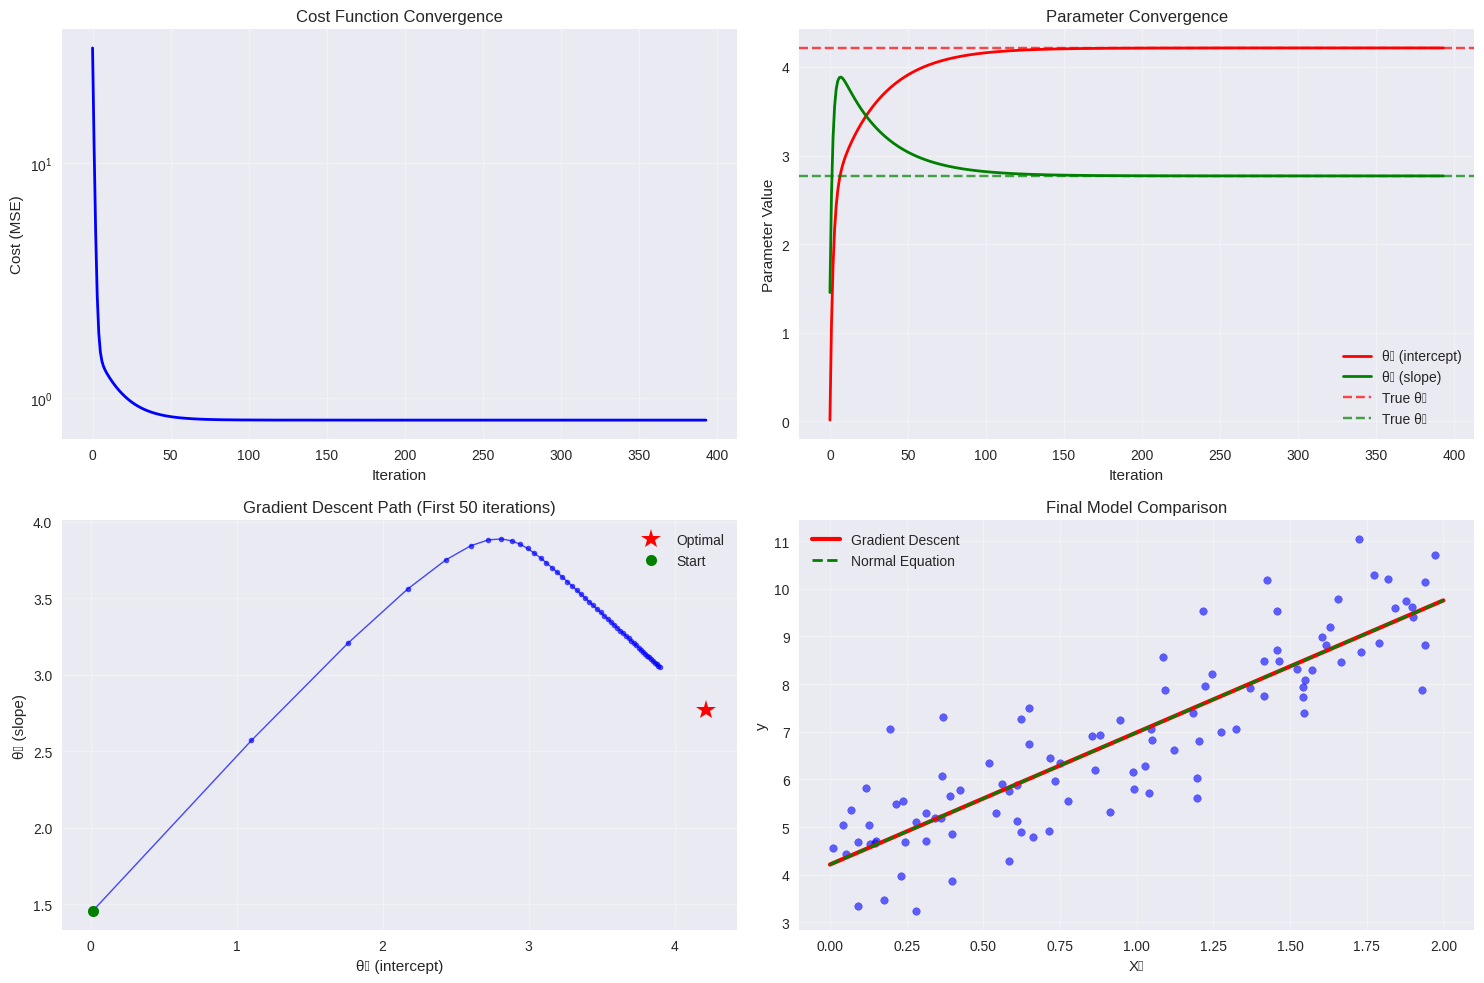

In [60]:
# Visualize Batch Gradient Descent convergence
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Cost function over iterations
axes[0, 0].plot(cost_history, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Cost (MSE)')
axes[0, 0].set_title('Cost Function Convergence')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')  # Log scale to see convergence better

# Plot 2: Parameter convergence
theta_0_history = [theta[0][0] for theta in theta_history]
theta_1_history = [theta[1][0] for theta in theta_history]

axes[0, 1].plot(theta_0_history, 'r-', linewidth=2, label='θ₀ (intercept)')
axes[0, 1].plot(theta_1_history, 'g-', linewidth=2, label='θ₁ (slope)')
axes[0, 1].axhline(y=theta_best[0][0], color='r', linestyle='--', alpha=0.7, label='True θ₀')
axes[0, 1].axhline(y=theta_best[1][0], color='g', linestyle='--', alpha=0.7, label='True θ₁')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Parameter Value')
axes[0, 1].set_title('Parameter Convergence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Gradient descent path in parameter space (first 50 iterations)
theta_0_vals = theta_0_history[:50]
theta_1_vals = theta_1_history[:50]

axes[1, 0].plot(theta_0_vals, theta_1_vals, 'bo-', markersize=4, linewidth=1, alpha=0.7)
axes[1, 0].plot(theta_best[0][0], theta_best[1][0], 'r*', markersize=15, label='Optimal')
axes[1, 0].plot(theta_0_vals[0], theta_1_vals[0], 'go', markersize=8, label='Start')
axes[1, 0].set_xlabel('θ₀ (intercept)')
axes[1, 0].set_ylabel('θ₁ (slope)')
axes[1, 0].set_title('Gradient Descent Path (First 50 iterations)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Final fitted line
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_b = np.c_[np.ones((100, 1)), X_plot]
y_plot_gd = X_plot_b.dot(theta_gd)
y_plot_true = X_plot_b.dot(theta_best)

axes[1, 1].scatter(X, y, alpha=0.6, color='blue', s=30)
axes[1, 1].plot(X_plot, y_plot_gd, 'r-', linewidth=3, label='Gradient Descent')
axes[1, 1].plot(X_plot, y_plot_true, 'g--', linewidth=2, label='Normal Equation')
axes[1, 1].set_xlabel('X₁')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_title('Final Model Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Learning Rate Effects

The learning rate $\eta$ is crucial for gradient descent convergence:
- **Too small**: Slow convergence, many iterations needed
- **Too large**: May overshoot and diverge
- **Just right**: Fast and stable convergence

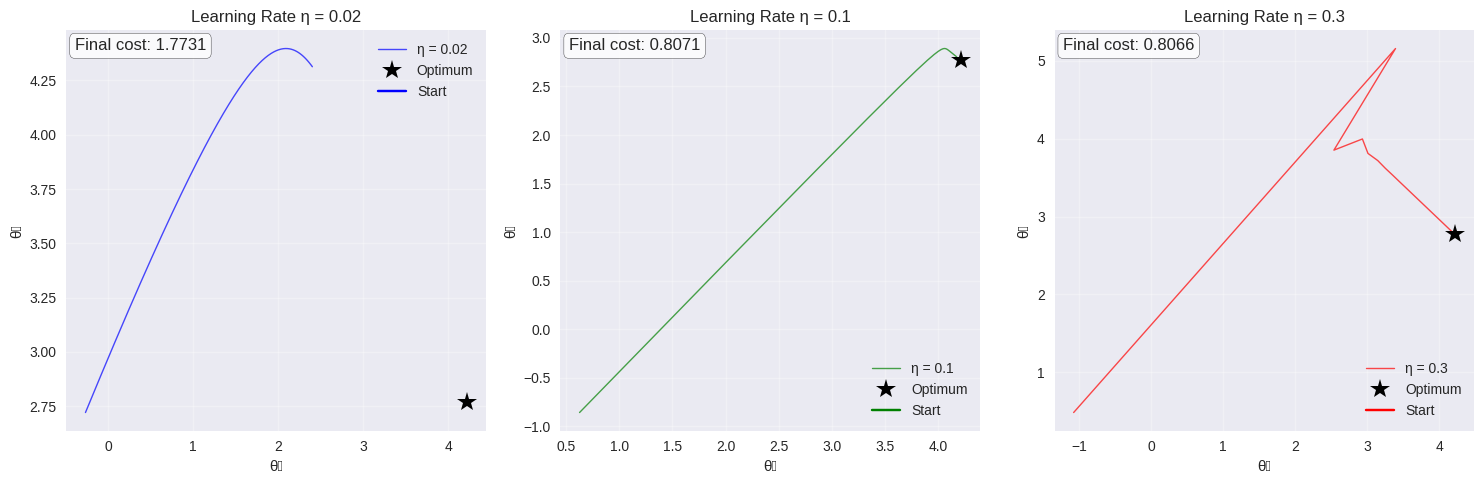

Learning Rate Analysis:
η = 0.02: Slow but steady convergence
η = 0.1:  Good balance, smooth convergence
η = 0.3:  Faster steps, may overshoot but still converges


In [61]:
# Compare different learning rates
learning_rates = [0.02, 0.1, 0.3]
colors = ['blue', 'green', 'red']
n_iterations = 50

plt.figure(figsize=(15, 5))

for i, (lr, color) in enumerate(zip(learning_rates, colors)):
    plt.subplot(1, 3, i+1)

    # Run gradient descent with different learning rates
    theta_lr, cost_history_lr, theta_history_lr = batch_gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=n_iterations
    )

    # Extract parameter paths
    theta_0_path = [theta[0][0] for theta in theta_history_lr]
    theta_1_path = [theta[1][0] for theta in theta_history_lr]

    # Plot the path in parameter space
    plt.plot(theta_0_path, theta_1_path, f'{color}', markersize=4,
             linewidth=1, alpha=0.7, label=f'η = {lr}')
    plt.plot(theta_best[0][0], theta_best[1][0], 'k*', markersize=15, label='Optimum')
    plt.plot(theta_0_path[0], theta_1_path[0], f'{color}', markersize=8, label='Start')

    plt.xlabel('θ₀')
    plt.ylabel('θ₁')
    plt.title(f'Learning Rate η = {lr}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add convergence info
    final_cost = cost_history_lr[-1]
    plt.text(0.02, 0.98, f'Final cost: {final_cost:.4f}',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Learning Rate Analysis:")
print("η = 0.02: Slow but steady convergence")
print("η = 0.1:  Good balance, smooth convergence")
print("η = 0.3:  Faster steps, may overshoot but still converges")

### Stochastic Gradient Descent (SGD)

SGD uses only one randomly selected training instance at each step.

**Characteristics:**
- Much faster iterations (processes one instance at a time)
- Irregular, bouncing convergence path
- Can escape local minima due to randomness
- Requires learning rate scheduling for convergence
- Memory efficient (out-of-core algorithm)

**Learning Schedule:**
$$\eta(t) = \frac{\eta_0}{t + t_1}$$

Where $\eta_0$ and $t_1$ are hyperparameters, and $t$ is the iteration number.

In [62]:
# Implement Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, n_epochs=50, t0=5, t1=50):
    """
    Implement Stochastic Gradient Descent

    Parameters:
    - X: Feature matrix (with bias term)
    - y: Target values
    - n_epochs: Number of epochs (passes through the dataset)
    - t0, t1: Learning schedule hyperparameters

    Returns:
    - theta: Final parameters
    - theta_history: Parameter evolution
    """
    m, n = X.shape

    # Learning schedule function
    def learning_schedule(t):
        return t0 / (t + t1)

    # Initialize parameters randomly
    theta = np.random.randn(n, 1)
    theta_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            # Pick a random instance
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Calculate gradients for this single instance
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

            # Update learning rate
            eta = learning_schedule(epoch * m + i)

            # Update parameters
            theta = theta - eta * gradients

            # Store parameters (every 10th iteration to reduce memory)
            if (epoch * m + i) % 10 == 0:
                theta_history.append(theta.copy())

    return theta, theta_history

# Apply Stochastic Gradient Descent
theta_sgd, theta_history_sgd = stochastic_gradient_descent(X_b, y)

print("Stochastic Gradient Descent Results:")
print(f"SGD parameters:       θ₀={theta_sgd[0][0]:.6f}, θ₁={theta_sgd[1][0]:.6f}")
print(f"Normal Equation:      θ₀={theta_best[0][0]:.6f}, θ₁={theta_best[1][0]:.6f}")
print(f"Batch GD:             θ₀={theta_gd[0][0]:.6f}, θ₁={theta_gd[1][0]:.6f}")

# Calculate final prediction error
y_pred_sgd = X_b.dot(theta_sgd)
mse_sgd = np.mean((y_pred_sgd - y)**2)
print(f"\nSGD MSE: {mse_sgd:.6f}")

Stochastic Gradient Descent Results:
SGD parameters:       θ₀=4.179115, θ₁=2.726304
Normal Equation:      θ₀=4.215096, θ₁=2.770113
Batch GD:             θ₀=4.215094, θ₁=2.770115

SGD MSE: 0.813214


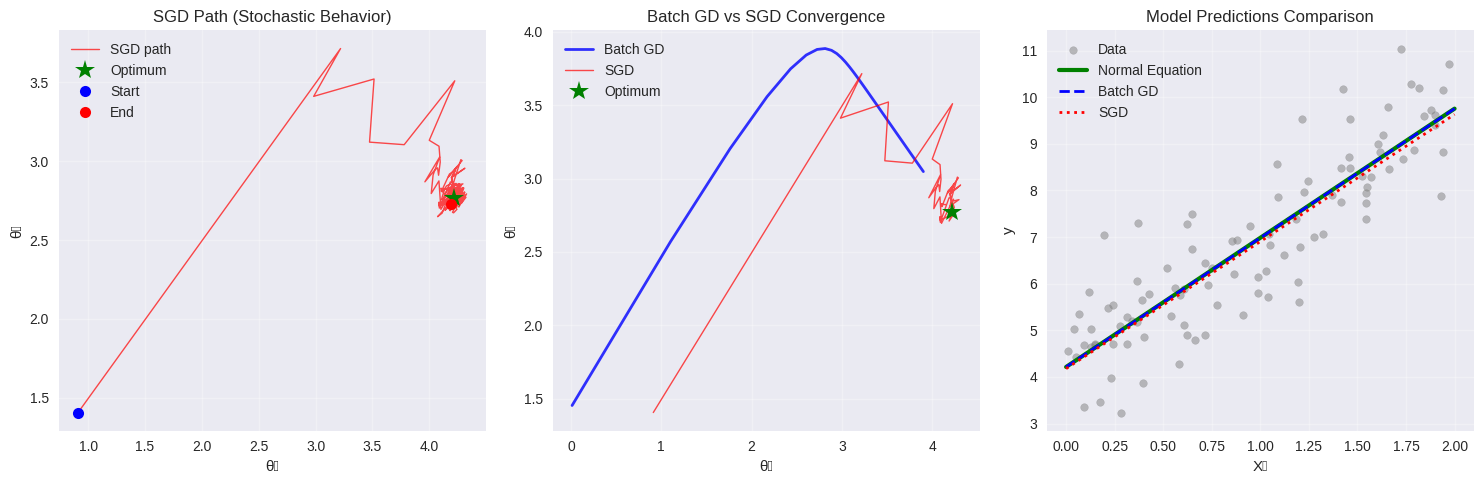

In [63]:
# Visualize SGD convergence pattern
plt.figure(figsize=(15, 5))

# Plot 1: SGD path in parameter space (showing the "bouncing" behavior)
plt.subplot(1, 3, 1)
theta_0_sgd = [theta[0][0] for theta in theta_history_sgd]
theta_1_sgd = [theta[1][0] for theta in theta_history_sgd]

plt.plot(theta_0_sgd, theta_1_sgd, 'r-', linewidth=1, alpha=0.7, label='SGD path')
plt.plot(theta_best[0][0], theta_best[1][0], 'g*', markersize=15, label='Optimum')
plt.plot(theta_0_sgd[0], theta_1_sgd[0], 'bo', markersize=8, label='Start')
plt.plot(theta_0_sgd[-1], theta_1_sgd[-1], 'ro', markersize=8, label='End')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('SGD Path (Stochastic Behavior)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Compare convergence patterns
plt.subplot(1, 3, 2)
# Plot batch GD path (smooth)
theta_0_batch = [theta[0][0] for theta in theta_history[:50]]  # First 50 iterations
theta_1_batch = [theta[1][0] for theta in theta_history[:50]]
plt.plot(theta_0_batch, theta_1_batch, 'b-', linewidth=2, label='Batch GD', alpha=0.8)

# Plot SGD path (bouncy)
plt.plot(theta_0_sgd[:50], theta_1_sgd[:50], 'r-', linewidth=1, alpha=0.7, label='SGD')
plt.plot(theta_best[0][0], theta_best[1][0], 'g*', markersize=15, label='Optimum')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Batch GD vs SGD Convergence')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Final predictions comparison
plt.subplot(1, 3, 3)
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_b = np.c_[np.ones((100, 1)), X_plot]

y_plot_batch = X_plot_b.dot(theta_gd)
y_plot_sgd = X_plot_b.dot(theta_sgd)
y_plot_normal = X_plot_b.dot(theta_best)

plt.scatter(X, y, alpha=0.5, color='gray', s=30, label='Data')
plt.plot(X_plot, y_plot_normal, 'g-', linewidth=3, label='Normal Equation')
plt.plot(X_plot, y_plot_batch, 'b--', linewidth=2, label='Batch GD')
plt.plot(X_plot, y_plot_sgd, 'r:', linewidth=2, label='SGD')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Model Predictions Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [64]:
# Compare with Scikit-Learn's SGDRegressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())  # SGDRegressor expects 1D target array

print("Scikit-Learn SGDRegressor Results:")
print(f"Intercept: {sgd_reg.intercept_[0]:.6f}")
print(f"Coefficient: {sgd_reg.coef_[0]:.6f}")
print(f"\nComparison with our implementation:")
print(f"Our SGD:    θ₀={theta_sgd[0][0]:.6f}, θ₁={theta_sgd[1][0]:.6f}")
print(f"Sklearn:    θ₀={sgd_reg.intercept_[0]:.6f}, θ₁={sgd_reg.coef_[0]:.6f}")

# Note: Results may differ due to different random initializations and implementations

Scikit-Learn SGDRegressor Results:
Intercept: 4.243653
Coefficient: 2.825088

Comparison with our implementation:
Our SGD:    θ₀=4.179115, θ₁=2.726304
Sklearn:    θ₀=4.243653, θ₁=2.825088


### Mini-batch Gradient Descent

Mini-batch GD is a compromise between Batch GD and SGD:
- Uses small random subsets (mini-batches) of the training set
- More stable than SGD, faster than Batch GD
- Benefits from hardware optimization (vectorized operations)
- Typical mini-batch sizes: 32, 64, 128, 256

**Algorithm Comparison:**

| Algorithm | Batch Size | Speed | Convergence | Memory |
|-----------|------------|-------|-------------|---------|
| Batch GD | m (full) | Slow | Smooth | High |
| Mini-batch GD | 32-256 | Medium | Moderately smooth | Medium |
| SGD | 1 | Fast | Noisy | Low |

In [65]:
# Implement Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, batch_size=20, learning_rate=0.1, n_epochs=50):
    """
    Implement Mini-batch Gradient Descent

    Parameters:
    - X: Feature matrix (with bias term)
    - y: Target values
    - batch_size: Size of mini-batches
    - learning_rate: Learning rate
    - n_epochs: Number of epochs

    Returns:
    - theta: Final parameters
    - theta_history: Parameter evolution
    - cost_history: Cost evolution
    """
    m, n = X.shape

    # Initialize parameters
    theta = np.random.randn(n, 1)
    theta_history = []
    cost_history = []

    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        epoch_cost = 0
        n_batches = 0

        # Process mini-batches
        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Calculate gradients for this mini-batch
            predictions = X_batch.dot(theta)
            gradients = (2/len(X_batch)) * X_batch.T.dot(predictions - y_batch)

            # Update parameters
            theta = theta - learning_rate * gradients

            # Track cost
            batch_cost = np.mean((predictions - y_batch)**2)
            epoch_cost += batch_cost
            n_batches += 1

        # Record progress
        avg_cost = epoch_cost / n_batches
        cost_history.append(avg_cost)
        theta_history.append(theta.copy())

    return theta, theta_history, cost_history

# Apply Mini-batch Gradient Descent
theta_mbgd, theta_history_mbgd, cost_history_mbgd = mini_batch_gradient_descent(
    X_b, y, batch_size=20, learning_rate=0.1, n_epochs=50
)

print("Mini-batch Gradient Descent Results:")
print(f"Mini-batch GD:    θ₀={theta_mbgd[0][0]:.6f}, θ₁={theta_mbgd[1][0]:.6f}")
print(f"Normal Equation:  θ₀={theta_best[0][0]:.6f}, θ₁={theta_best[1][0]:.6f}")
print(f"Batch GD:         θ₀={theta_gd[0][0]:.6f}, θ₁={theta_gd[1][0]:.6f}")
print(f"SGD:              θ₀={theta_sgd[0][0]:.6f}, θ₁={theta_sgd[1][0]:.6f}")

print(f"\nFinal Mini-batch GD cost: {cost_history_mbgd[-1]:.6f}")

Mini-batch Gradient Descent Results:
Mini-batch GD:    θ₀=4.216047, θ₁=2.775093
Normal Equation:  θ₀=4.215096, θ₁=2.770113
Batch GD:         θ₀=4.215094, θ₁=2.770115
SGD:              θ₀=4.179115, θ₁=2.726304

Final Mini-batch GD cost: 0.831881


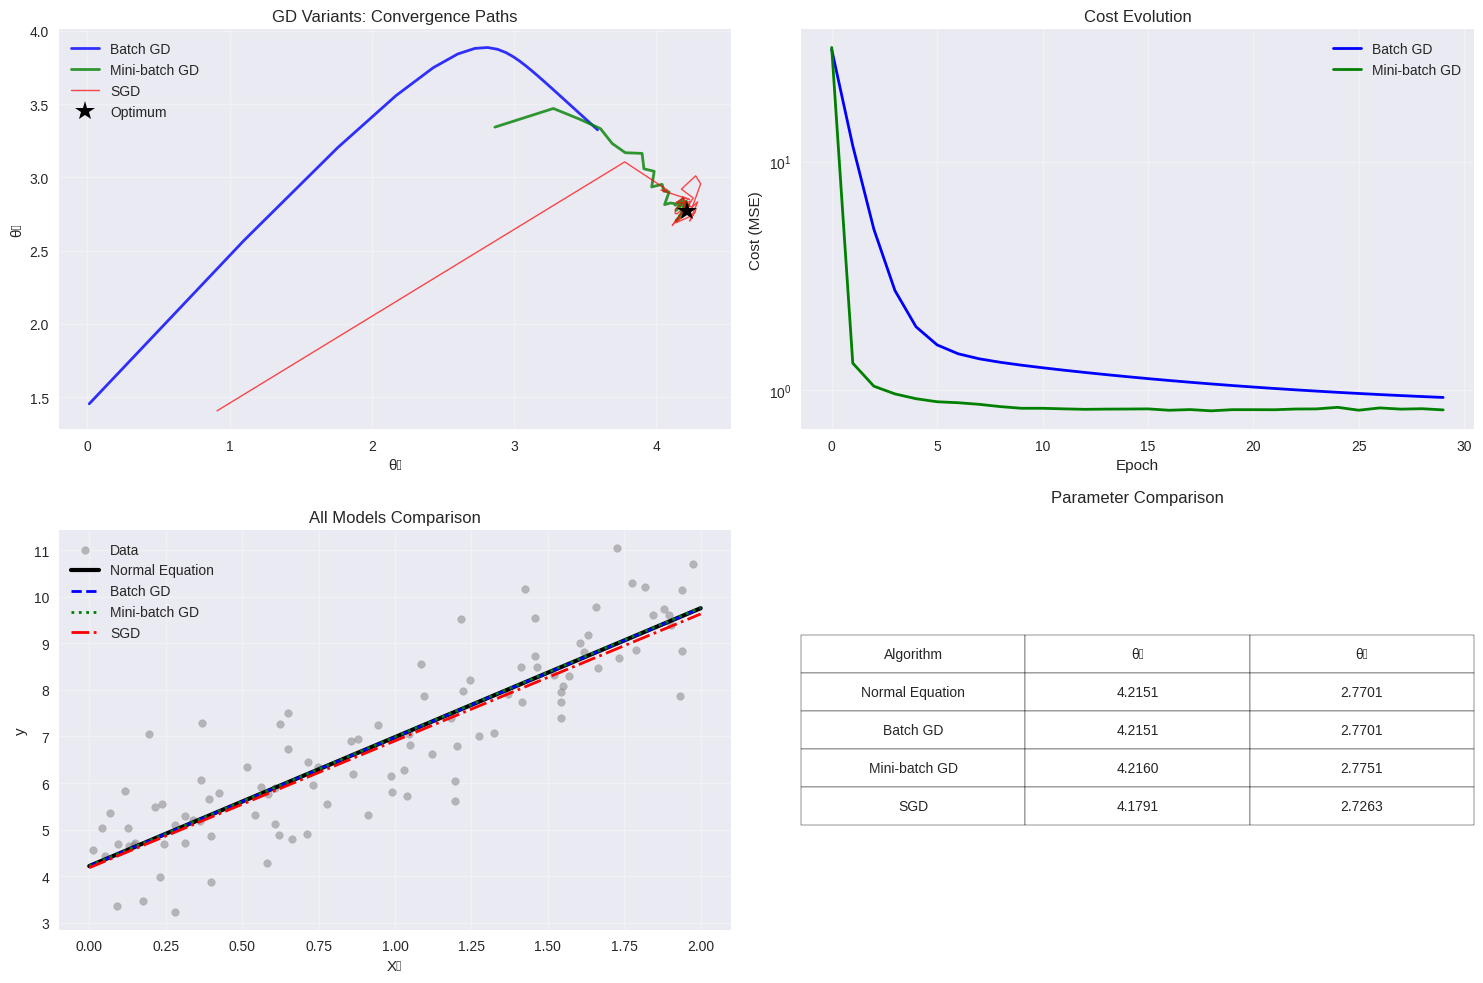


Gradient Descent Algorithm Summary:
1. Batch GD: Uses full dataset, smooth convergence, computationally expensive
2. Mini-batch GD: Good balance, moderate smoothness, hardware-friendly
3. SGD: Fast iterations, noisy convergence, memory-efficient
4. All methods converge to similar solutions for this convex problem


In [66]:
# Comprehensive comparison of all Gradient Descent variants
plt.figure(figsize=(15, 10))

# Plot 1: Convergence paths in parameter space
plt.subplot(2, 2, 1)
# Batch GD
theta_0_batch = [theta[0][0] for theta in theta_history[:30]]
theta_1_batch = [theta[1][0] for theta in theta_history[:30]]
plt.plot(theta_0_batch, theta_1_batch, 'b-', linewidth=2, label='Batch GD', alpha=0.8)

# Mini-batch GD
theta_0_mbgd = [theta[0][0] for theta in theta_history_mbgd[:30]]
theta_1_mbgd = [theta[1][0] for theta in theta_history_mbgd[:30]]
plt.plot(theta_0_mbgd, theta_1_mbgd, 'g-', linewidth=2, label='Mini-batch GD', alpha=0.8)

# SGD (subsample for clarity)
theta_0_sgd_sub = theta_0_sgd[::5][:30]  # Every 5th point
theta_1_sgd_sub = theta_1_sgd[::5][:30]
plt.plot(theta_0_sgd_sub, theta_1_sgd_sub, 'r-', linewidth=1, label='SGD', alpha=0.7)

plt.plot(theta_best[0][0], theta_best[1][0], 'k*', markersize=15, label='Optimum')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('GD Variants: Convergence Paths')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cost evolution comparison
plt.subplot(2, 2, 2)
plt.plot(cost_history[:30], 'b-', linewidth=2, label='Batch GD')
plt.plot(cost_history_mbgd[:30], 'g-', linewidth=2, label='Mini-batch GD')
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE)')
plt.title('Cost Evolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Final model predictions
plt.subplot(2, 2, 3)
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_b = np.c_[np.ones((100, 1)), X_plot]

y_plot_normal = X_plot_b.dot(theta_best)
y_plot_batch = X_plot_b.dot(theta_gd)
y_plot_mbgd = X_plot_b.dot(theta_mbgd)
y_plot_sgd = X_plot_b.dot(theta_sgd)

plt.scatter(X, y, alpha=0.5, color='gray', s=30, label='Data')
plt.plot(X_plot, y_plot_normal, 'k-', linewidth=3, label='Normal Equation')
plt.plot(X_plot, y_plot_batch, 'b--', linewidth=2, label='Batch GD')
plt.plot(X_plot, y_plot_mbgd, 'g:', linewidth=2, label='Mini-batch GD')
plt.plot(X_plot, y_plot_sgd, 'r-.', linewidth=2, label='SGD')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('All Models Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Algorithm comparison table
plt.subplot(2, 2, 4)
plt.axis('off')

# Create comparison table
algorithms = ['Normal Equation', 'Batch GD', 'Mini-batch GD', 'SGD']
theta_0_vals = [theta_best[0][0], theta_gd[0][0], theta_mbgd[0][0], theta_sgd[0][0]]
theta_1_vals = [theta_best[1][0], theta_gd[1][0], theta_mbgd[1][0], theta_sgd[1][0]]

table_data = []
for i, alg in enumerate(algorithms):
    table_data.append([alg, f'{theta_0_vals[i]:.4f}', f'{theta_1_vals[i]:.4f}'])

table = plt.table(cellText=table_data,
                 colLabels=['Algorithm', 'θ₀', 'θ₁'],
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('Parameter Comparison', pad=20)

plt.tight_layout()
plt.show()

print("\nGradient Descent Algorithm Summary:")
print("1. Batch GD: Uses full dataset, smooth convergence, computationally expensive")
print("2. Mini-batch GD: Good balance, moderate smoothness, hardware-friendly")
print("3. SGD: Fast iterations, noisy convergence, memory-efficient")
print("4. All methods converge to similar solutions for this convex problem")

## 4. Polynomial Regression

When data is more complex than a straight line, we can use Polynomial Regression by adding powers of features as new features.

### Mathematical Foundation

For a single feature with degree $d$:
$$\hat{y} = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \cdots + \theta_dx^d$$

**Feature Expansion:**
- Original features: $[x_1, x_2]$
- Degree 2: $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$
- Number of features grows as: $\binom{n+d}{d} = \frac{(n+d)!}{d!n!}$

**Caution:** Combinatorial explosion of features with high degrees!

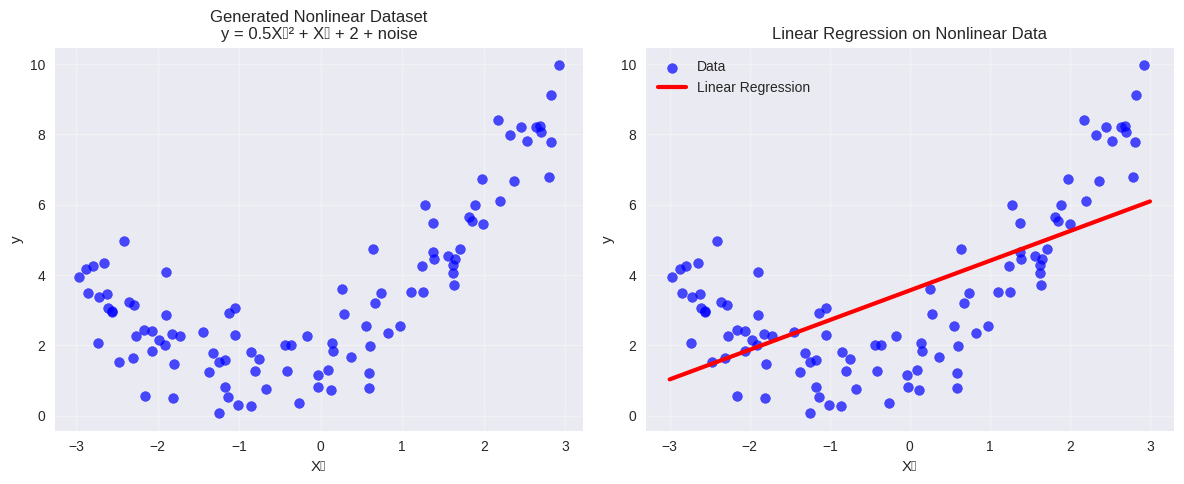

Linear regression MSE: 3.0246
Clearly, a straight line cannot capture the quadratic relationship!


In [67]:
# Generate nonlinear data as shown in the book
# Following a quadratic equation: y = 0.5*x² + x + 2 + noise
np.random.seed(42)
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3  # Random values between -3 and 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

# Visualize the nonlinear data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_poly, y_poly, alpha=0.7, color='blue', s=50)
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Generated Nonlinear Dataset\ny = 0.5X₁² + X₁ + 2 + noise')
plt.grid(True, alpha=0.3)

# Show why linear regression fails
plt.subplot(1, 2, 2)
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_poly, y_poly)
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot_linear = lin_reg_simple.predict(X_plot)

plt.scatter(X_poly, y_poly, alpha=0.7, color='blue', s=50, label='Data')
plt.plot(X_plot, y_plot_linear, 'r-', linewidth=3, label='Linear Regression')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Linear Regression on Nonlinear Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Linear regression MSE: {mean_squared_error(y_poly, lin_reg_simple.predict(X_poly)):.4f}")
print("Clearly, a straight line cannot capture the quadratic relationship!")

In [68]:
# Apply Polynomial Features transformation
from sklearn.preprocessing import PolynomialFeatures

# Transform features to include polynomial terms
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_expanded = poly_features.fit_transform(X_poly)

print("Polynomial Features Transformation:")
print(f"Original feature shape: {X_poly.shape}")
print(f"Expanded feature shape: {X_poly_expanded.shape}")
print(f"\nFirst few samples:")
print("Original X → [X, X²]")
for i in range(3):
    print(f"{X_poly[i][0]:6.3f} → [{X_poly_expanded[i][0]:6.3f}, {X_poly_expanded[i][1]:6.3f}]")

print(f"\nFeature names: {poly_features.get_feature_names_out()}")

# Fit linear regression on polynomial features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_expanded, y_poly)

print(f"\nPolynomial Regression Results:")
print(f"Intercept: {lin_reg_poly.intercept_[0]:.4f}")
print(f"Coefficients: {lin_reg_poly.coef_[0]}")
print(f"Model: ŷ = {lin_reg_poly.intercept_[0]:.3f} + {lin_reg_poly.coef_[0][0]:.3f}×X + {lin_reg_poly.coef_[0][1]:.3f}×X²")
print(f"True model: y = 2.000 + 1.000×X + 0.500×X² + noise")

# Calculate MSE
y_pred_poly = lin_reg_poly.predict(X_poly_expanded)
mse_poly = mean_squared_error(y_poly, y_pred_poly)
print(f"\nPolynomial Regression MSE: {mse_poly:.4f}")
print(f"Linear Regression MSE:     {mean_squared_error(y_poly, lin_reg_simple.predict(X_poly)):.4f}")
print(f"Improvement: {((mean_squared_error(y_poly, lin_reg_simple.predict(X_poly)) - mse_poly)/mean_squared_error(y_poly, lin_reg_simple.predict(X_poly))*100):.1f}%")

Polynomial Features Transformation:
Original feature shape: (100, 1)
Expanded feature shape: (100, 2)

First few samples:
Original X → [X, X²]
-0.753 → [-0.753,  0.567]
 2.704 → [ 2.704,  7.313]
 1.392 → [ 1.392,  1.938]

Feature names: ['x0' 'x0^2']

Polynomial Regression Results:
Intercept: 1.7813
Coefficients: [0.93366893 0.56456263]
Model: ŷ = 1.781 + 0.934×X + 0.565×X²
True model: y = 2.000 + 1.000×X + 0.500×X² + noise

Polynomial Regression MSE: 0.7772
Linear Regression MSE:     3.0246
Improvement: 74.3%


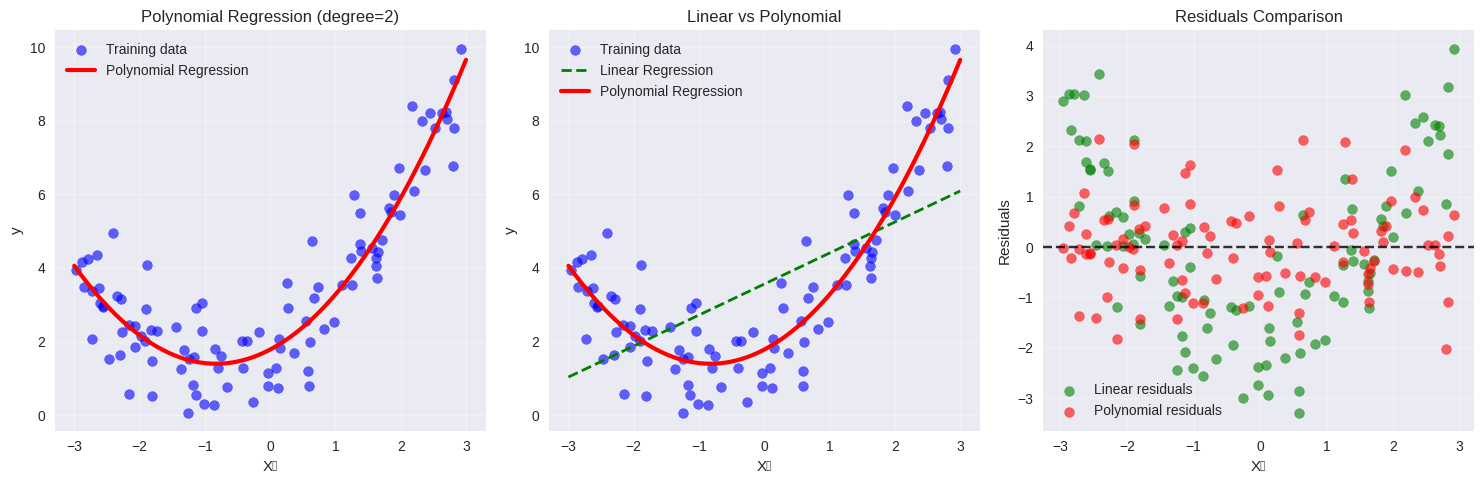

In [69]:
# Visualize polynomial regression results
plt.figure(figsize=(15, 5))

# Plot 1: Polynomial regression fit
plt.subplot(1, 3, 1)
X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = lin_reg_poly.predict(X_plot_poly)

plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=50, label='Training data')
plt.plot(X_plot, y_plot_poly, 'r-', linewidth=3, label='Polynomial Regression')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Compare linear vs polynomial
plt.subplot(1, 3, 2)
y_plot_linear = lin_reg_simple.predict(X_plot)

plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=50, label='Training data')
plt.plot(X_plot, y_plot_linear, 'g--', linewidth=2, label='Linear Regression')
plt.plot(X_plot, y_plot_poly, 'r-', linewidth=3, label='Polynomial Regression')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Linear vs Polynomial')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Residuals comparison
plt.subplot(1, 3, 3)
residuals_linear = y_poly - lin_reg_simple.predict(X_poly)
residuals_poly = y_poly - y_pred_poly

plt.scatter(X_poly, residuals_linear, alpha=0.6, color='green', s=50, label='Linear residuals')
plt.scatter(X_poly, residuals_poly, alpha=0.6, color='red', s=50, label='Polynomial residuals')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8)
plt.xlabel('X₁')
plt.ylabel('Residuals')
plt.title('Residuals Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

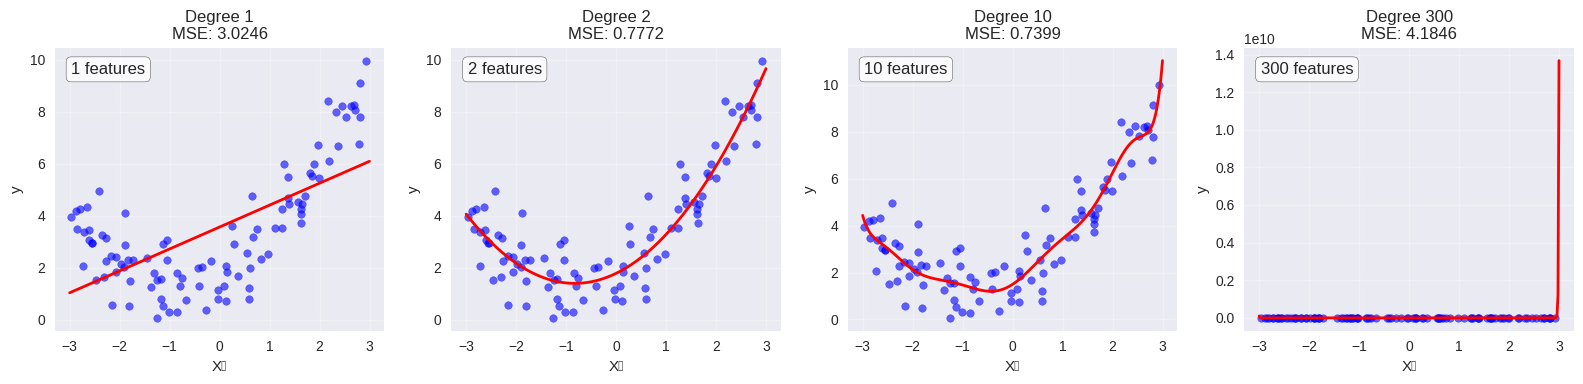

Polynomial Degree Analysis:
• Degree 1 (Linear): Underfitting - too simple to capture the quadratic relationship
• Degree 2 (Quadratic): Good fit - matches the true underlying relationship
• Degree 10: Starting to overfit - unnecessary complexity
• Degree 300: Severe overfitting - memorizing noise, will generalize poorly

Feature Explosion with Polynomial Degrees:
Degree  1:   1 features
Degree  2:   2 features
Degree  3:   3 features
Degree  5:   5 features
Degree 10:  10 features


In [70]:
# Demonstrate overfitting with high-degree polynomials
degrees = [1, 2, 10, 300]
plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees):
    plt.subplot(1, 4, i+1)

    # Create polynomial features
    poly_features_deg = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_deg = poly_features_deg.fit_transform(X_poly)

    # Fit model
    lin_reg_deg = LinearRegression()
    lin_reg_deg.fit(X_poly_deg, y_poly)

    # Make predictions
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_deg = poly_features_deg.transform(X_plot)
    y_plot_deg = lin_reg_deg.predict(X_plot_deg)

    # Calculate MSE
    y_pred_deg = lin_reg_deg.predict(X_poly_deg)
    mse_deg = mean_squared_error(y_poly, y_pred_deg)

    # Plot
    plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=30)
    plt.plot(X_plot, y_plot_deg, 'r-', linewidth=2)
    plt.xlabel('X₁')
    plt.ylabel('y')
    plt.title(f'Degree {degree}\nMSE: {mse_deg:.4f}')
    plt.grid(True, alpha=0.3)

    # Add text showing number of features
    n_features = X_poly_deg.shape[1]
    plt.text(0.05, 0.95, f'{n_features} features', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Polynomial Degree Analysis:")
print("• Degree 1 (Linear): Underfitting - too simple to capture the quadratic relationship")
print("• Degree 2 (Quadratic): Good fit - matches the true underlying relationship")
print("• Degree 10: Starting to overfit - unnecessary complexity")
print("• Degree 300: Severe overfitting - memorizing noise, will generalize poorly")

# Demonstrate feature explosion
print("\nFeature Explosion with Polynomial Degrees:")
for d in [1, 2, 3, 5, 10]:
    n_features = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X_poly[:1]).shape[1]
    print(f"Degree {d:2d}: {n_features:3d} features")

## 5. Learning Curves

Learning curves plot model performance on training and validation sets as a function of training set size. They help diagnose:

**Underfitting (High Bias):**
- Both training and validation errors are high
- Small gap between training and validation curves
- Both curves plateau at a high error level
- **Solution**: Use a more complex model or better features

**Overfitting (High Variance):**
- Low training error, high validation error
- Large gap between training and validation curves
- Training error increases with more data
- **Solution**: Get more data, reduce model complexity, or apply regularization

**Good Fit:**
- Both errors converge to a low value
- Small gap between curves
- Validation error decreases with more data

In [71]:
# Implement learning curve plotting function from the book
def plot_learning_curves(model, X, y, title="Learning Curves"):
    """
    Plot learning curves for a given model

    Parameters:
    - model: Sklearn model to evaluate
    - X: Feature matrix
    - y: Target values
    - title: Plot title
    """
    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    train_errors, val_errors = [], []
    train_sizes = []

    # Vary training set size
    for m in range(1, len(X_train), max(1, len(X_train)//20)):  # 20 points
        # Train model on subset of data
        model.fit(X_train[:m], y_train[:m])

        # Predict on training subset and validation set
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        # Calculate RMSE
        train_error = np.sqrt(mean_squared_error(y_train[:m], y_train_predict))
        val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))

        train_errors.append(train_error)
        val_errors.append(val_error)
        train_sizes.append(m)

    # Plot learning curves
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training error")
    plt.plot(train_sizes, val_errors, "b-", linewidth=3, label="Validation error")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

    return train_sizes, train_errors, val_errors

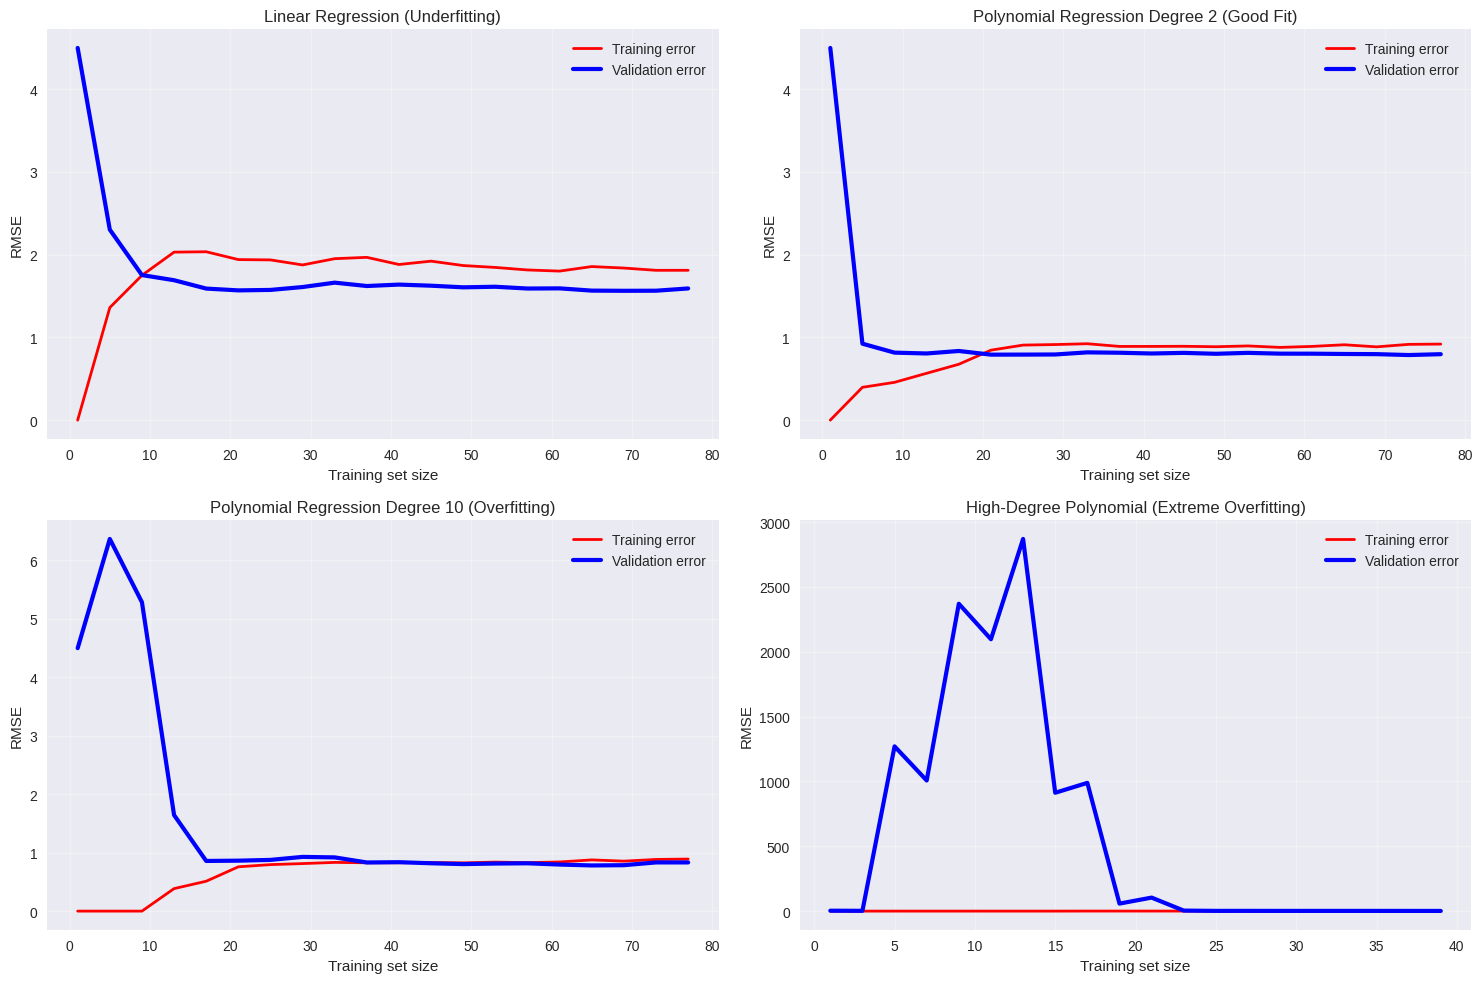

Learning Curves Analysis:

1. Linear Regression (Underfitting):
   • Both training and validation errors are high and converge
   • Small gap between curves
   • Model is too simple for the data

2. Polynomial Degree 2 (Good Fit):
   • Both errors decrease and converge to a low value
   • Reasonable gap between curves
   • Model complexity matches data complexity

3. Polynomial Degree 10 (Overfitting):
   • Low training error, higher validation error
   • Noticeable gap between curves
   • Model memorizes training data but doesn't generalize well

4. High-Degree Polynomial (Extreme Overfitting):
   • Very low training error, very high validation error
   • Large gap between curves
   • Model severely overfits the training data


In [72]:
# Generate learning curves for different models
plt.figure(figsize=(15, 10))

# Model 1: Linear regression on nonlinear data (underfitting)
plt.subplot(2, 2, 1)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y_poly, "Linear Regression (Underfitting)")

# Model 2: Polynomial regression degree 2 (good fit)
plt.subplot(2, 2, 2)
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X_poly, y_poly, "Polynomial Regression Degree 2 (Good Fit)")

# Model 3: Polynomial regression degree 10 (overfitting)
plt.subplot(2, 2, 3)
polynomial_regression_10 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression_10, X_poly, y_poly, "Polynomial Regression Degree 10 (Overfitting)")

# Model 4: Polynomial regression degree 300 (extreme overfitting)
plt.subplot(2, 2, 4)
# Use fewer data points to avoid numerical issues
X_poly_small = X_poly[:50]
y_poly_small = y_poly[:50]
polynomial_regression_300 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),  # Reduced from 300
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression_300, X_poly_small, y_poly_small, "High-Degree Polynomial (Extreme Overfitting)")

plt.tight_layout()
plt.show()

print("Learning Curves Analysis:")
print("\n1. Linear Regression (Underfitting):")
print("   • Both training and validation errors are high and converge")
print("   • Small gap between curves")
print("   • Model is too simple for the data")

print("\n2. Polynomial Degree 2 (Good Fit):")
print("   • Both errors decrease and converge to a low value")
print("   • Reasonable gap between curves")
print("   • Model complexity matches data complexity")

print("\n3. Polynomial Degree 10 (Overfitting):")
print("   • Low training error, higher validation error")
print("   • Noticeable gap between curves")
print("   • Model memorizes training data but doesn't generalize well")

print("\n4. High-Degree Polynomial (Extreme Overfitting):")
print("   • Very low training error, very high validation error")
print("   • Large gap between curves")
print("   • Model severely overfits the training data")

### The Bias/Variance Trade-off

A fundamental concept in machine learning: model's generalization error can be decomposed into:

**Total Error = Bias² + Variance + Irreducible Error**

**Bias:**
- Error due to wrong assumptions (e.g., assuming linear when data is quadratic)
- High bias → underfitting
- Reduced by increasing model complexity

**Variance:**
- Error due to sensitivity to small variations in training data
- High variance → overfitting
- Reduced by regularization or more training data

**Irreducible Error:**
- Error due to noise in the data itself
- Cannot be reduced by any model
- Only way to reduce: clean the data

**The Trade-off:**
- Increasing model complexity: ↓ Bias, ↑ Variance
- Decreasing model complexity: ↑ Bias, ↓ Variance
- Goal: Find the sweet spot that minimizes total error

Running bias-variance analysis (this may take a moment...)


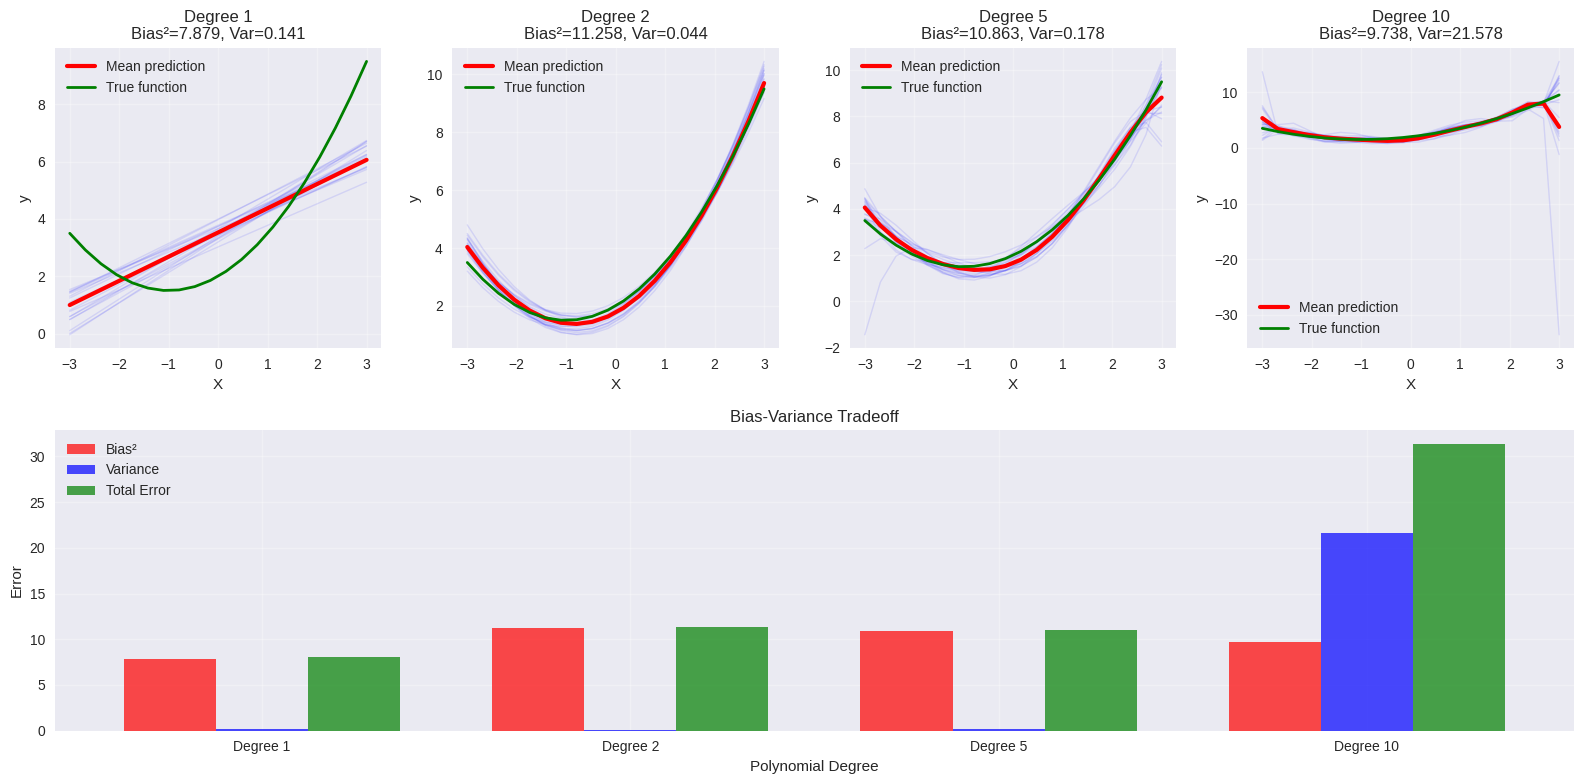


Bias-Variance Decomposition:
Degree | Bias² | Variance | Total
-------|-------|----------|-------
   1   | 7.879 |   0.141  | 8.020
   2   | 11.258 |   0.044  | 11.302
   5   | 10.863 |   0.178  | 11.041
  10   | 9.738 |  21.578  | 31.316

Observations:
• Low degree (1): High bias, low variance (underfitting)
• Medium degree (2): Low bias, low variance (good fit)
• High degree (5, 10): Low bias, high variance (overfitting)


In [73]:
# Demonstrate bias-variance tradeoff
def bias_variance_analysis(X, y, n_experiments=100):
    """
    Empirically demonstrate bias-variance tradeoff
    """
    degrees = [1, 2, 5, 10]
    n_test = 20

    # Generate test points
    X_test = np.linspace(-3, 3, n_test).reshape(-1, 1)

    results = {}

    for degree in degrees:
        predictions = []

        # Run multiple experiments with different training sets
        for experiment in range(n_experiments):
            # Sample training data with noise
            indices = np.random.choice(len(X), size=50, replace=True)
            X_train = X[indices]
            y_train = y[indices]

            # Fit polynomial model
            poly_model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                ("lin_reg", LinearRegression()),
            ])
            poly_model.fit(X_train, y_train)

            # Predict on test points
            y_pred = poly_model.predict(X_test)
            predictions.append(y_pred)

        predictions = np.array(predictions)

        # Calculate bias and variance
        mean_predictions = np.mean(predictions, axis=0)

        # True function (without noise)
        y_true = 0.5 * X_test**2 + X_test + 2

        # Bias squared
        bias_squared = np.mean((mean_predictions - y_true.ravel())**2)

        # Variance
        variance = np.mean(np.var(predictions, axis=0))

        results[degree] = {
            'bias_squared': bias_squared,
            'variance': variance,
            'total': bias_squared + variance,
            'predictions': predictions,
            'mean_predictions': mean_predictions
        }

    return results, X_test, y_true

# Run bias-variance analysis
print("Running bias-variance analysis (this may take a moment...)")
results, X_test, y_true = bias_variance_analysis(X_poly, y_poly)

# Visualize results
plt.figure(figsize=(16, 8))

# Plot predictions from multiple models
for i, degree in enumerate([1, 2, 5, 10]):
    plt.subplot(2, 4, i+1)

    # Plot some individual predictions (first 20 experiments)
    for j in range(20):
        plt.plot(X_test, results[degree]['predictions'][j], 'b-', alpha=0.1, linewidth=1)

    # Plot mean prediction
    plt.plot(X_test, results[degree]['mean_predictions'], 'r-', linewidth=3, label='Mean prediction')

    # Plot true function
    plt.plot(X_test, y_true, 'g-', linewidth=2, label='True function')

    plt.title(f'Degree {degree}\nBias²={results[degree]["bias_squared"]:.3f}, Var={results[degree]["variance"]:.3f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot bias-variance decomposition
plt.subplot(2, 1, 2)
degrees = list(results.keys())
bias_squared = [results[d]['bias_squared'] for d in degrees]
variance = [results[d]['variance'] for d in degrees]
total = [results[d]['total'] for d in degrees]

x_pos = np.arange(len(degrees))
width = 0.25

plt.bar(x_pos - width, bias_squared, width, label='Bias²', color='red', alpha=0.7)
plt.bar(x_pos, variance, width, label='Variance', color='blue', alpha=0.7)
plt.bar(x_pos + width, total, width, label='Total Error', color='green', alpha=0.7)

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.xticks(x_pos, [f'Degree {d}' for d in degrees])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("\nBias-Variance Decomposition:")
print("Degree | Bias² | Variance | Total")
print("-------|-------|----------|-------")
for degree in degrees:
    bias_sq = results[degree]['bias_squared']
    var = results[degree]['variance']
    total = results[degree]['total']
    print(f"  {degree:2d}   | {bias_sq:5.3f} |  {var:6.3f}  | {total:5.3f}")

print("\nObservations:")
print("• Low degree (1): High bias, low variance (underfitting)")
print("• Medium degree (2): Low bias, low variance (good fit)")
print("• High degree (5, 10): Low bias, high variance (overfitting)")

## 6. Regularized Linear Models

Regularization constrains model parameters to prevent overfitting by adding a penalty term to the cost function.

### Ridge Regression (L2 Regularization)

**Equation 4-8: Ridge Regression Cost Function**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$

**Equation 4-9: Ridge Regression Closed-form Solution**
$$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{A})^{-1}\mathbf{X}^T\mathbf{y}$$

Where $\mathbf{A}$ is the identity matrix except $A_{0,0} = 0$ (bias term not regularized).

**Properties:**
- Shrinks weights toward zero but never exactly to zero
- Works well when most :
**Properties:**
- Shrinks weights toward zero but never exactly to zero
- Works well when most features are useful
- Handles multicollinearity well
- Computationally efficient (closed-form solution available)

**Hyperparameter α:**
- α = 0: Regular Linear Regression
- α → ∞: All weights approach zero (flat line through data mean)
- Must scale features before applying Ridge Regression!

Original data shape: (100, 1)
Polynomial features shape: (100, 10)
Scaled features shape: (100, 10)


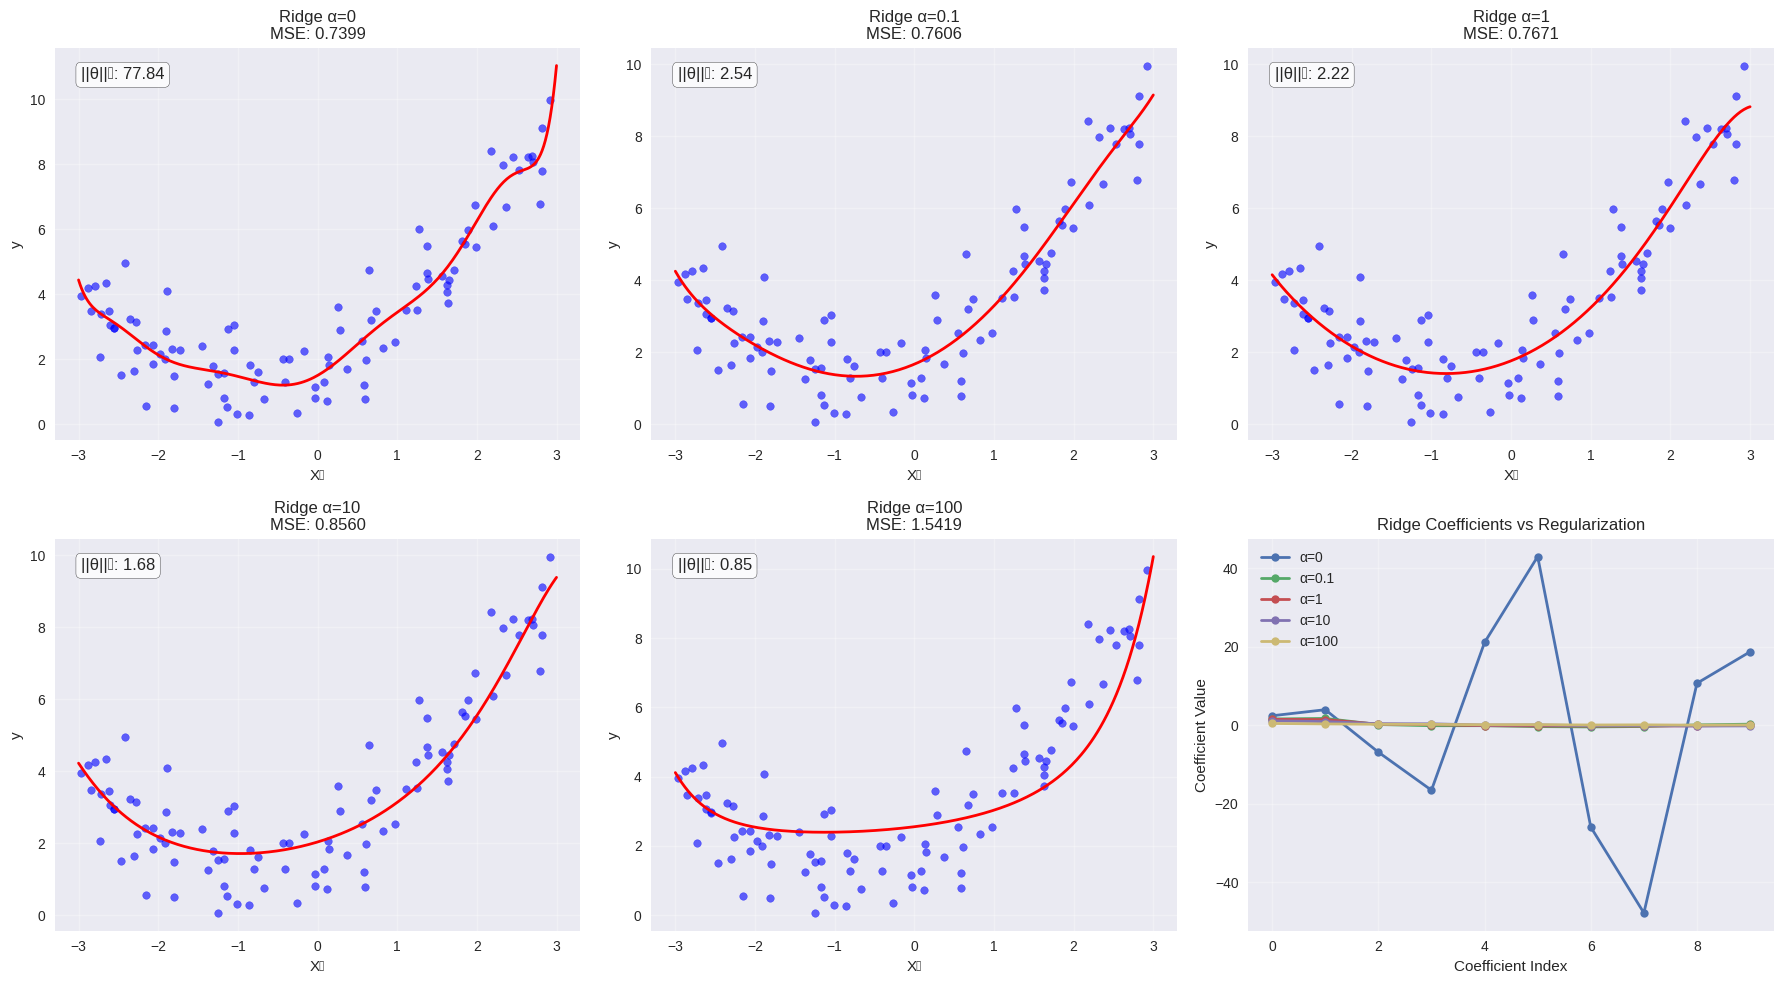

Ridge Regression Analysis:
• α=0: No regularization, potential overfitting
• α=0.1: Light regularization, smoother curve
• α=1: Moderate regularization, balanced fit
• α=10: Strong regularization, simpler model
• α=100: Very strong regularization, almost linear

Note: As α increases, coefficient magnitudes decrease (||θ||₂ shrinks)


In [74]:
# Demonstrate Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Generate polynomial features for demonstration
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly_features = poly_features.fit_transform(X_poly)

# Scale features (important for Ridge!)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_features)

print(f"Original data shape: {X_poly.shape}")
print(f"Polynomial features shape: {X_poly_features.shape}")
print(f"Scaled features shape: {X_poly_scaled.shape}")

# Compare different Ridge regularization strengths
alphas = [0, 0.1, 1, 10, 100]
plt.figure(figsize=(18, 10))

# Plot regularization effects
for i, alpha in enumerate(alphas):
    plt.subplot(2, 3, i+1)

    # Fit Ridge regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_poly_scaled, y_poly)

    # Make predictions for plotting
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_scaled = scaler.transform(X_plot_poly)
    y_plot_ridge = ridge_reg.predict(X_plot_scaled)

    # Calculate training error
    y_pred_ridge = ridge_reg.predict(X_poly_scaled)
    mse_ridge = mean_squared_error(y_poly, y_pred_ridge)

    # Plot
    plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=30)
    plt.plot(X_plot, y_plot_ridge, 'r-', linewidth=2)
    plt.xlabel('X₁')
    plt.ylabel('y')
    plt.title(f'Ridge α={alpha}\nMSE: {mse_ridge:.4f}')
    plt.grid(True, alpha=0.3)

    # Add coefficient information
    coef_norm = np.linalg.norm(ridge_reg.coef_)
    plt.text(0.05, 0.95, f'||θ||₂: {coef_norm:.2f}', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot coefficient values
plt.subplot(2, 3, 6)
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_poly_scaled, y_poly)
    plt.plot(ridge_reg.coef_, 'o-', label=f'α={alpha}', linewidth=2, markersize=6)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs Regularization')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Ridge Regression Analysis:")
print("• α=0: No regularization, potential overfitting")
print("• α=0.1: Light regularization, smoother curve")
print("• α=1: Moderate regularization, balanced fit")
print("• α=10: Strong regularization, simpler model")
print("• α=100: Very strong regularization, almost linear")
print("\nNote: As α increases, coefficient magnitudes decrease (||θ||₂ shrinks)")

### Lasso Regression (L1 Regularization)

**Equation 4-10: Lasso Regression Cost Function**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha\sum_{i=1}^{n}|\theta_i|$$

**Equation 4-11: Lasso Subgradient Vector**
$$\mathbf{g}(\boldsymbol{\theta}, J) = \nabla_\theta\text{MSE}(\boldsymbol{\theta}) + \alpha\begin{pmatrix}\text{sign}(\theta_1)\\\text{sign}(\theta_2)\\\vdots\\\text{sign}(\theta_n)\end{pmatrix}$$

Where $\text{sign}(\theta_i) = \begin{cases}-1 & \text{if } \theta_i < 0\\0 & \text{if } \theta_i = 0\\+1 & \text{if } \theta_i > 0\end{cases}$

**Key Properties:**
- Tends to eliminate weights of least important features (sets them to exactly zero)
- Performs automatic feature selection
- Produces sparse models (few non-zero weights)
- No closed-form solution (uses iterative methods)
- Can be unstable when features are highly correlated

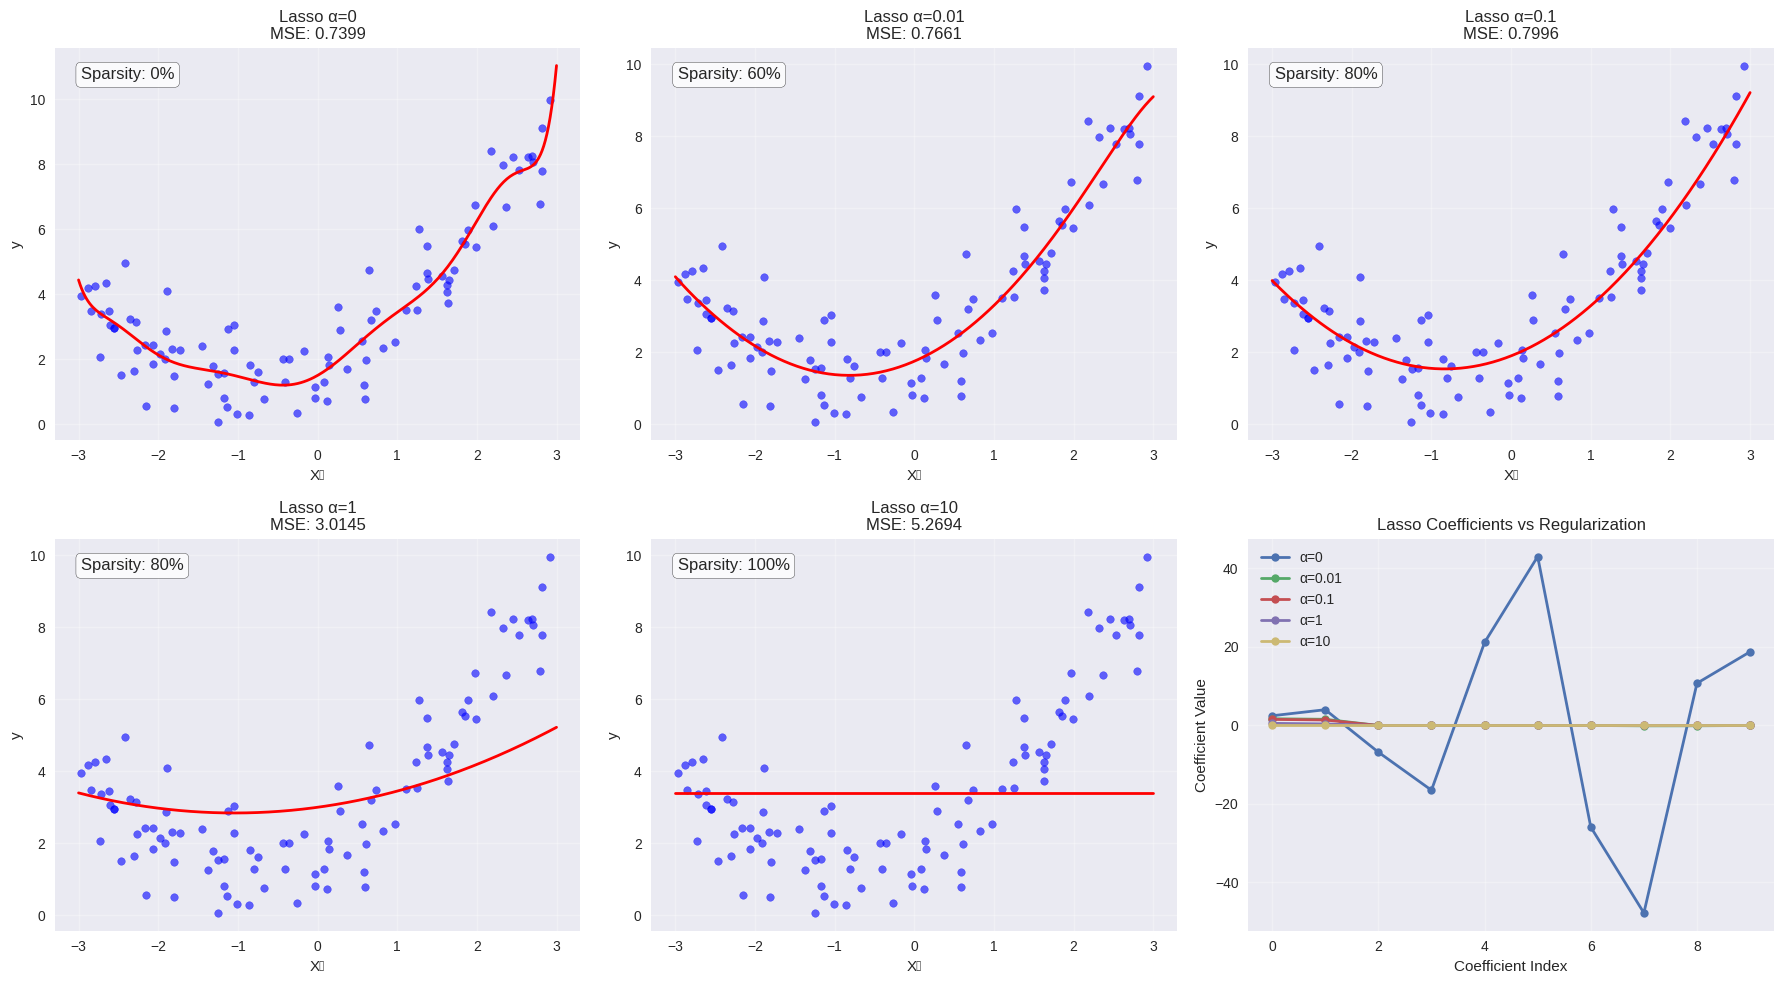

Lasso Sparsity Analysis:
Alpha | Sparsity | Non-zero Features
------|----------|------------------
 0.00 |     0.0% |        10
 0.01 |    60.0% |         4
 0.10 |    80.0% |         2
 1.00 |    80.0% |         2
10.00 |   100.0% |         0

Lasso vs Ridge:
• Lasso performs automatic feature selection
• Ridge shrinks coefficients but keeps all features
• Lasso creates sparse models (many coefficients = 0)
• Ridge creates dense models (all coefficients ≠ 0)


In [75]:
# Demonstrate Lasso Regression
from sklearn.linear_model import Lasso

# Compare Lasso with different regularization strengths
alphas_lasso = [0, 0.01, 0.1, 1, 10]
plt.figure(figsize=(18, 10))

# Store coefficient information for analysis
lasso_coefs = []
lasso_sparsity = []

for i, alpha in enumerate(alphas_lasso):
    plt.subplot(2, 3, i+1)

    if alpha == 0:
        # Use Ridge with very small alpha instead of Lasso with alpha=0
        model = Ridge(alpha=1e-10)
    else:
        model = Lasso(alpha=alpha, max_iter=10000)

    model.fit(X_poly_scaled, y_poly.ravel())

    # Make predictions
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_scaled = scaler.transform(X_plot_poly)
    y_plot_lasso = model.predict(X_plot_scaled)

    # Calculate training error
    y_pred_lasso = model.predict(X_poly_scaled)
    mse_lasso = mean_squared_error(y_poly.ravel(), y_pred_lasso)

    # Plot
    plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=30)
    plt.plot(X_plot, y_plot_lasso, 'r-', linewidth=2)
    plt.xlabel('X₁')
    plt.ylabel('y')
    plt.title(f'Lasso α={alpha}\nMSE: {mse_lasso:.4f}')
    plt.grid(True, alpha=0.3)

    # Calculate sparsity (number of zero coefficients)
    n_zero_coefs = np.sum(np.abs(model.coef_) < 1e-6)
    n_total_coefs = len(model.coef_)
    sparsity = n_zero_coefs / n_total_coefs * 100

    plt.text(0.05, 0.95, f'Sparsity: {sparsity:.0f}%', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    lasso_coefs.append(model.coef_.copy())
    lasso_sparsity.append(sparsity)

# Plot coefficient paths
plt.subplot(2, 3, 6)
for i, alpha in enumerate(alphas_lasso):
    plt.plot(lasso_coefs[i], 'o-', label=f'α={alpha}', linewidth=2, markersize=6)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Regularization')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show sparsity analysis
print("Lasso Sparsity Analysis:")
print("Alpha | Sparsity | Non-zero Features")
print("------|----------|------------------")
for i, alpha in enumerate(alphas_lasso):
    n_nonzero = len(lasso_coefs[i]) - int(lasso_sparsity[i] * len(lasso_coefs[i]) / 100)
    print(f"{alpha:5.2f} |   {lasso_sparsity[i]:5.1f}% |        {n_nonzero:2d}")

print("\nLasso vs Ridge:")
print("• Lasso performs automatic feature selection")
print("• Ridge shrinks coefficients but keeps all features")
print("• Lasso creates sparse models (many coefficients = 0)")
print("• Ridge creates dense models (all coefficients ≠ 0)")

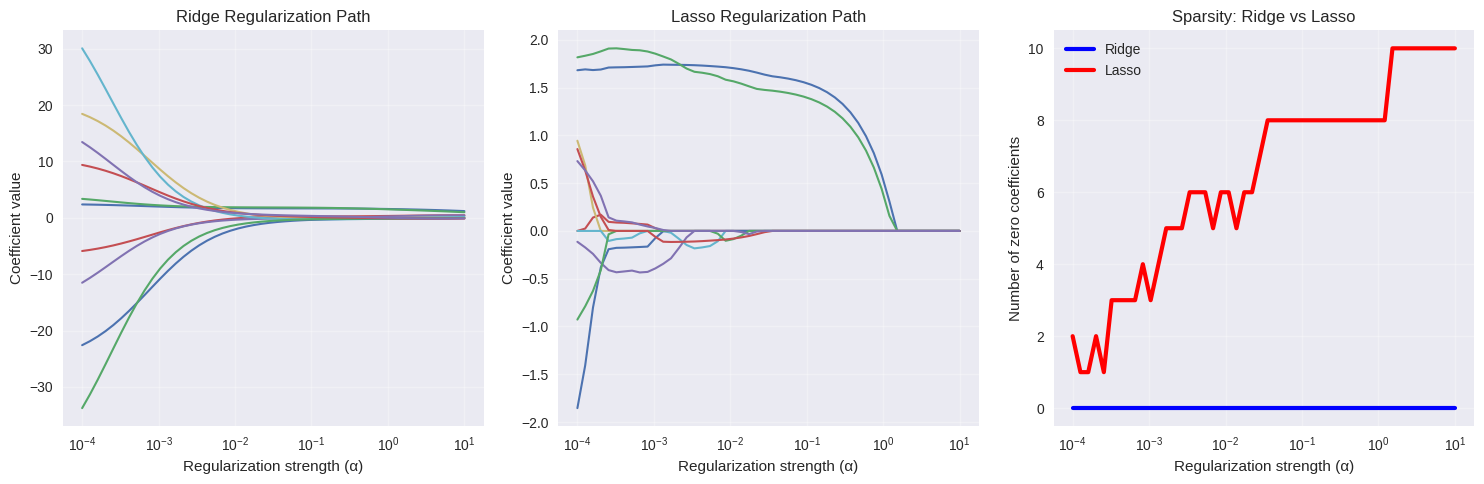

Regularization Path Analysis:
• Ridge: Coefficients shrink smoothly toward zero but never reach exactly zero
• Lasso: Coefficients hit zero abruptly, creating sparse models
• Lasso's L1 penalty creates 'corners' in the cost function, leading to sparsity
• Ridge's L2 penalty creates smooth contours, avoiding exact zero solutions


In [76]:
# Visual comparison of Lasso vs Ridge regularization paths
plt.figure(figsize=(15, 5))

# Create a range of alpha values for path plotting
alphas_range = np.logspace(-4, 1, 50)

# Ridge path
plt.subplot(1, 3, 1)
ridge_coefs = []
for alpha in alphas_range:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly_scaled, y_poly.ravel())
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas_range, ridge_coefs[:, i], linewidth=1.5)

plt.xscale('log')
plt.xlabel('Regularization strength (α)')
plt.ylabel('Coefficient value')
plt.title('Ridge Regularization Path')
plt.grid(True, alpha=0.3)

# Lasso path
plt.subplot(1, 3, 2)
lasso_coefs = []
for alpha in alphas_range:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly_scaled, y_poly.ravel())
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.array(lasso_coefs)
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas_range, lasso_coefs[:, i], linewidth=1.5)

plt.xscale('log')
plt.xlabel('Regularization strength (α)')
plt.ylabel('Coefficient value')
plt.title('Lasso Regularization Path')
plt.grid(True, alpha=0.3)

# Sparsity comparison
plt.subplot(1, 3, 3)
ridge_sparsity = [np.sum(np.abs(coef) < 1e-6) for coef in ridge_coefs]
lasso_sparsity = [np.sum(np.abs(coef) < 1e-6) for coef in lasso_coefs]

plt.plot(alphas_range, ridge_sparsity, 'b-', linewidth=3, label='Ridge')
plt.plot(alphas_range, lasso_sparsity, 'r-', linewidth=3, label='Lasso')
plt.xscale('log')
plt.xlabel('Regularization strength (α)')
plt.ylabel('Number of zero coefficients')
plt.title('Sparsity: Ridge vs Lasso')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Regularization Path Analysis:")
print("• Ridge: Coefficients shrink smoothly toward zero but never reach exactly zero")
print("• Lasso: Coefficients hit zero abruptly, creating sparse models")
print("• Lasso's L1 penalty creates 'corners' in the cost function, leading to sparsity")
print("• Ridge's L2 penalty creates smooth contours, avoiding exact zero solutions")

### Elastic Net

Elastic Net combines both Ridge and Lasso regularization:

**Equation 4-12: Elastic Net Cost Function**
$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$$

Where:
- $r$ is the mix ratio (l1_ratio in Scikit-Learn)
- $r = 0$: Pure Ridge regression
- $r = 1$: Pure Lasso regression
- $0 < r < 1$: Combination of both

**When to use each:**
- **Ridge**: Good default choice, handles multicollinearity well
- **Lasso**: When you suspect only a few features are important
- **Elastic Net**: When you want feature selection but Lasso is too aggressive
- **Plain Linear Regression**: Almost never (always add some regularization)

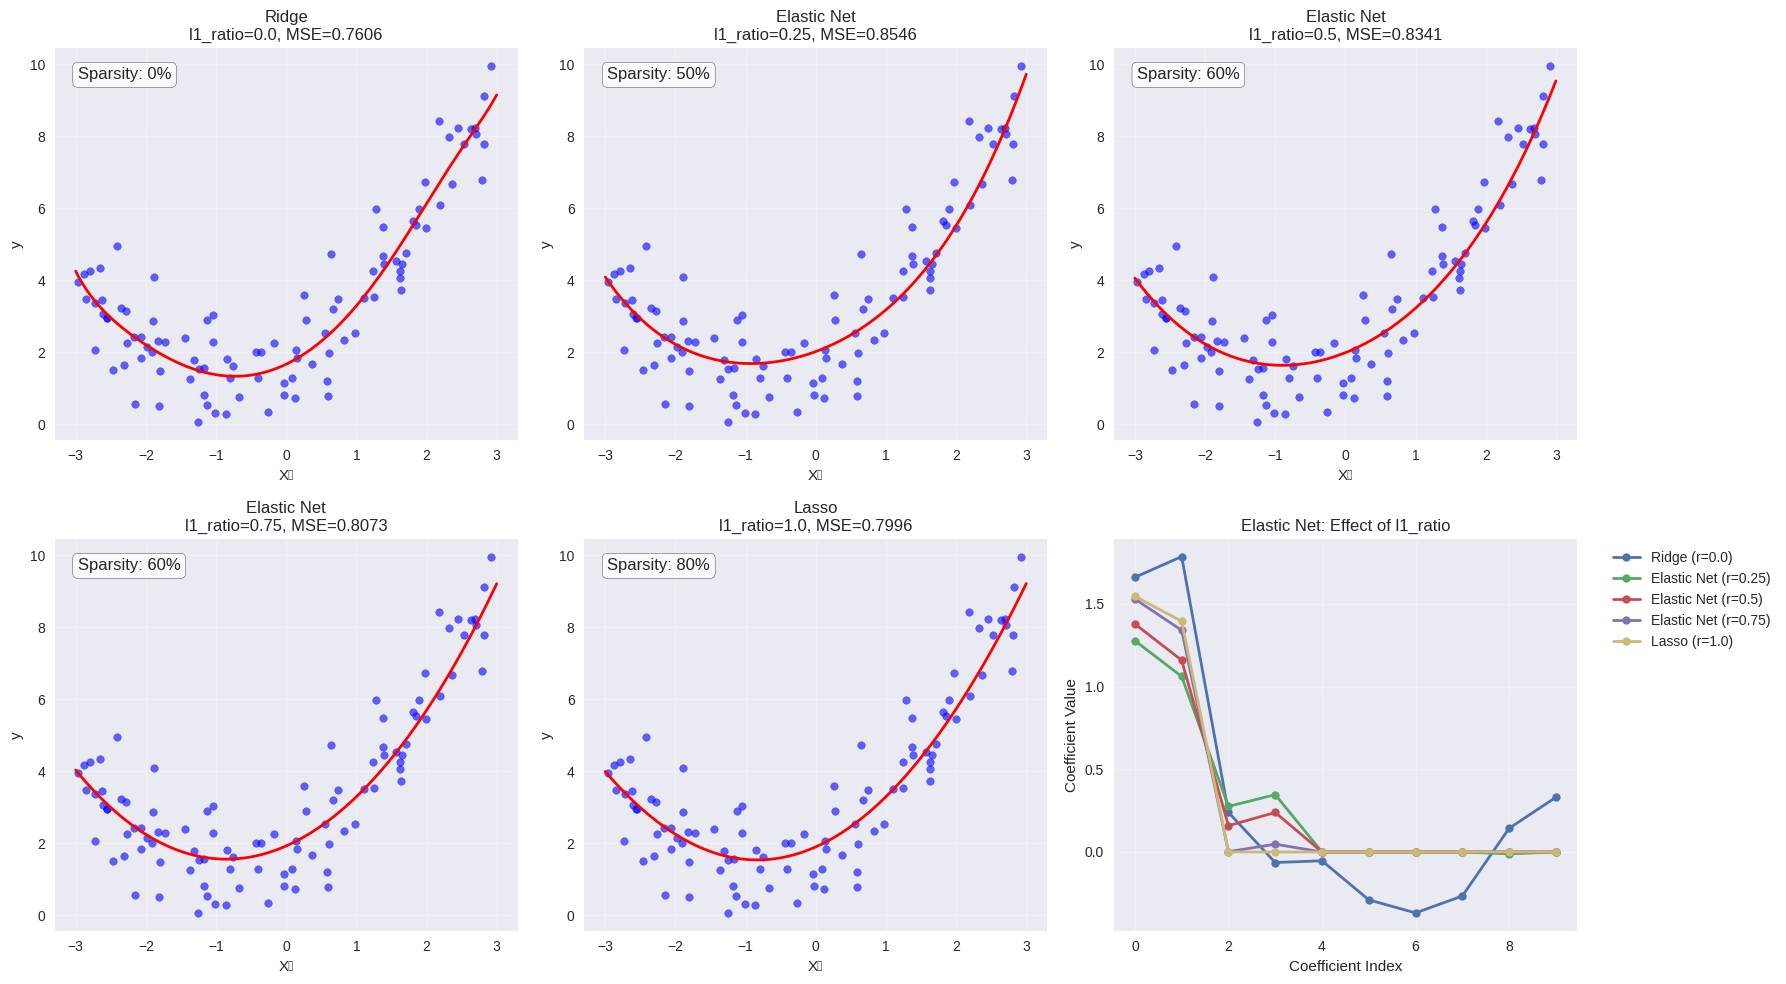

Elastic Net Comparison (α=0.1):
l1_ratio | Model Type  | MSE    | Sparsity | Non-zero Features
---------|-------------|--------|----------|------------------
  0.00   | Ridge       | 0.7606 |     0.0% |        10
  0.25   | Elastic Net | 0.8546 |    50.0% |         5
  0.50   | Elastic Net | 0.8341 |    60.0% |         4
  0.75   | Elastic Net | 0.8073 |    60.0% |         4
  1.00   | Lasso       | 0.7996 |    80.0% |         2

Elastic Net Benefits:
• Combines advantages of Ridge and Lasso
• More stable than Lasso when features are correlated
• Provides feature selection like Lasso but less aggressive
• l1_ratio allows fine-tuning the Ridge/Lasso balance


In [77]:
# Demonstrate Elastic Net
from sklearn.linear_model import ElasticNet

# Compare different l1_ratio values
l1_ratios = [0.0, 0.25, 0.5, 0.75, 1.0]
alpha = 0.1  # Fixed alpha for comparison

plt.figure(figsize=(18, 10))

elastic_results = []

for i, l1_ratio in enumerate(l1_ratios):
    plt.subplot(2, 3, i+1)

    if l1_ratio == 0.0:
        # Pure Ridge
        model = Ridge(alpha=alpha)
        model_name = 'Ridge'
    elif l1_ratio == 1.0:
        # Pure Lasso
        model = Lasso(alpha=alpha, max_iter=10000)
        model_name = 'Lasso'
    else:
        # Elastic Net
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model_name = 'Elastic Net'

    model.fit(X_poly_scaled, y_poly.ravel())

    # Make predictions
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    X_plot_scaled = scaler.transform(X_plot_poly)
    y_plot_elastic = model.predict(X_plot_scaled)

    # Calculate metrics
    y_pred_elastic = model.predict(X_poly_scaled)
    mse_elastic = mean_squared_error(y_poly.ravel(), y_pred_elastic)

    # Calculate sparsity
    n_zero_coefs = np.sum(np.abs(model.coef_) < 1e-6)
    sparsity = n_zero_coefs / len(model.coef_) * 100

    # Plot
    plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=30)
    plt.plot(X_plot, y_plot_elastic, 'r-', linewidth=2)
    plt.xlabel('X₁')
    plt.ylabel('y')
    plt.title(f'{model_name}\nl1_ratio={l1_ratio}, MSE={mse_elastic:.4f}')
    plt.grid(True, alpha=0.3)

    plt.text(0.05, 0.95, f'Sparsity: {sparsity:.0f}%', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    elastic_results.append({
        'l1_ratio': l1_ratio,
        'model_name': model_name,
        'mse': mse_elastic,
        'sparsity': sparsity,
        'coef': model.coef_.copy()
    })

# Plot coefficient comparison
plt.subplot(2, 3, 6)
for result in elastic_results:
    label = f"{result['model_name']} (r={result['l1_ratio']})"
    plt.plot(result['coef'], 'o-', label=label, linewidth=2, markersize=6)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net: Effect of l1_ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("Elastic Net Comparison (α=0.1):")
print("l1_ratio | Model Type  | MSE    | Sparsity | Non-zero Features")
print("---------|-------------|--------|----------|------------------")
for result in elastic_results:
    n_nonzero = len(result['coef']) - int(result['sparsity'] * len(result['coef']) / 100)
    print(f"  {result['l1_ratio']:4.2f}   | {result['model_name']:11s} | {result['mse']:6.4f} |   {result['sparsity']:5.1f}% |        {n_nonzero:2d}")

print("\nElastic Net Benefits:")
print("• Combines advantages of Ridge and Lasso")
print("• More stable than Lasso when features are correlated")
print("• Provides feature selection like Lasso but less aggressive")
print("• l1_ratio allows fine-tuning the Ridge/Lasso balance")

### Early Stopping

Early Stopping is a regularization technique for iterative algorithms:

**Algorithm:**
1. Monitor validation error during training
2. Stop training when validation error starts increasing
3. Revert to model with lowest validation error

**Benefits:**
- Simple and effective regularization
- No additional hyperparameters to tune
- Works with any iterative algorithm
- Geoffrey Hinton called it a "beautiful free lunch"

**Implementation Considerations:**
- Use patience: don't stop immediately on first increase
- Save best model periodically
- Monitor multiple metrics if needed

Early stopping at epoch 58
Best epoch: 7 with validation error: 12.907786


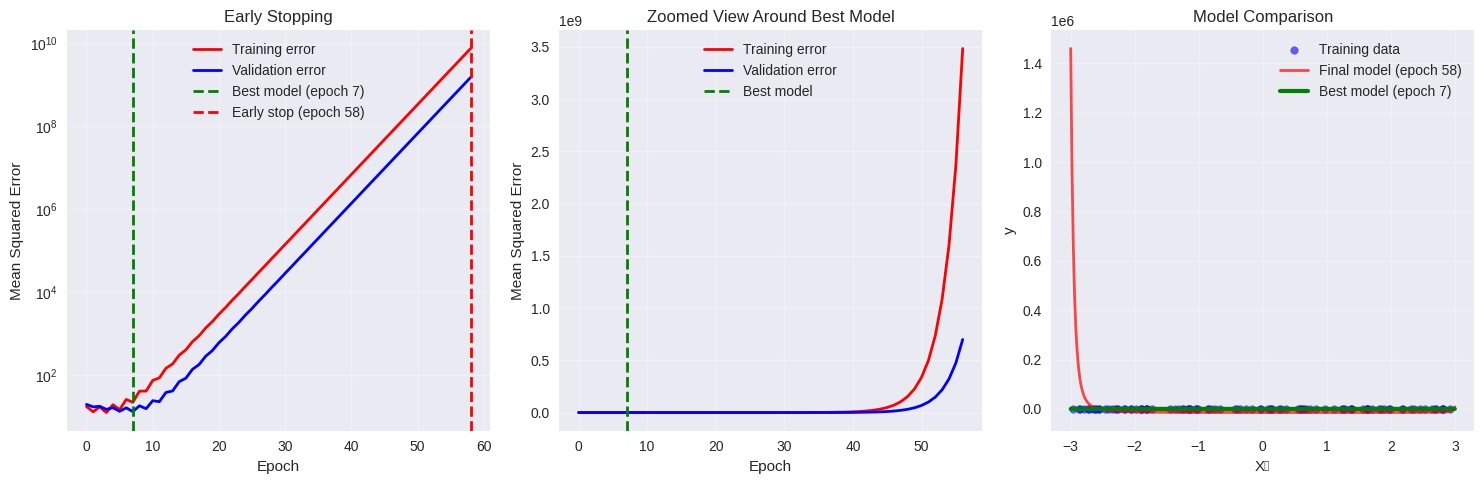


Early Stopping Results:
Best model found at epoch: 7
Training stopped at epoch: 58
Best validation error: 12.907786
Final validation error: 1522411561.543575
Early stopping prevented overfitting by stopping 51 epochs early


In [78]:
# Implement Early Stopping with SGD
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for early stopping demo
# Use polynomial features to make overfitting more likely
poly_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)
X_train_poly_scaled = poly_pipeline.fit_transform(X_train)
X_val_poly_scaled = poly_pipeline.transform(X_val)

# Implement early stopping with SGD
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_coef_ = None
train_errors = []
val_errors = []
epochs = []

# Early stopping training loop
for epoch in range(1000):
    # Train for one epoch
    sgd_reg.fit(X_train_poly_scaled, y_train.flatten())

    # Calculate errors
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # Corrected typo: sgd_reg

    train_error = mean_squared_error(y_train.flatten(), y_train_predict)
    val_error = mean_squared_error(y_val.flatten(), y_val_predict)

    train_errors.append(train_error)
    val_errors.append(val_error)
    epochs.append(epoch)

    # Check for best model
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_coef_ = sgd_reg.coef_.copy()
        if sgd_reg.intercept_ is not None:
            best_intercept_ = sgd_reg.intercept_.copy()
        else:
            best_intercept_ = None


    # Early stopping condition (with patience)
    if epoch > best_epoch + 50:  # Stop if no improvement for 50 epochs
        print(f"Early stopping at epoch {epoch}")
        print(f"Best epoch: {best_epoch} with validation error: {minimum_val_error:.6f}")
        break

# Create a new SGDRegressor instance with the best coefficients
best_model = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                          penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
best_model.coef_ = best_coef_
best_model.intercept_ = best_intercept_
# We need to manually set the _is_fitted attribute to True
best_model.n_iter_ = 1
best_model.t_ = 1.0 # This is needed internally by predict


# Visualize early stopping
plt.figure(figsize=(15, 5))

# Plot 1: Learning curves with early stopping
plt.subplot(1, 3, 1)
plt.plot(epochs, train_errors, 'r-', linewidth=2, label='Training error')
plt.plot(epochs, val_errors, 'b-', linewidth=2, label='Validation error')
plt.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, label=f'Best model (epoch {best_epoch})')
plt.axvline(x=epochs[-1], color='red', linestyle='--', linewidth=2, label=f'Early stop (epoch {epochs[-1]})')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Early Stopping')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Zoom in on the best model region
plt.subplot(1, 3, 2)
start_idx = max(0, best_epoch - 20)
end_idx = min(len(epochs), best_epoch + 50)

plt.plot(epochs[start_idx:end_idx], train_errors[start_idx:end_idx], 'r-', linewidth=2, label='Training error')
plt.plot(epochs[start_idx:end_idx], val_errors[start_idx:end_idx], 'b-', linewidth=2, label='Validation error')
plt.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, label='Best model')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Zoomed View Around Best Model')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Compare models with and without early stopping
plt.subplot(1, 3, 3)

# Final model (potentially overfitted)
X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
X_plot_scaled = poly_pipeline.transform(X_plot)
y_plot_final = sgd_reg.predict(X_plot_scaled)
y_plot_best = best_model.predict(X_plot_scaled)

plt.scatter(X_poly, y_poly, alpha=0.6, color='blue', s=30, label='Training data')
plt.plot(X_plot, y_plot_final, 'r-', linewidth=2, label=f'Final model (epoch {epochs[-1]})', alpha=0.7)
plt.plot(X_plot, y_plot_best, 'g-', linewidth=3, label=f'Best model (epoch {best_epoch})')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEarly Stopping Results:")
print(f"Best model found at epoch: {best_epoch}")
print(f"Training stopped at epoch: {epochs[-1]}")
print(f"Best validation error: {minimum_val_error:.6f}")
print(f"Final validation error: {val_errors[-1]:.6f}")
print(f"Early stopping prevented overfitting by stopping {epochs[-1] - best_epoch} epochs early")

## 7. Logistic Regression

Logistic Regression is used for binary classification by estimating the probability that an instance belongs to a particular class.

### Mathematical Foundation

**Equation 4-13: Logistic Regression Model**
$$\hat{p} = h_\theta(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T\mathbf{x})$$

**Equation 4-14: Logistic (Sigmoid) Function**
$$\sigma(t) = \frac{1}{1 + \exp(-t)}$$

**Equation 4-15: Prediction Rule**
$$\hat{y} = \begin{cases}0 & \text{if } \hat{p} < 0.5\\1 & \text{if } \hat{p} \geq 0.5\end{cases}$$

**Properties of Sigmoid Function:**
- Output range: (0, 1) - perfect for probabilities
- S-shaped curve
- σ(0) = 0.5 (decision boundary)
- σ(-t) = 1 - σ(t) (symmetry)
- Derivative: σ'(t) = σ(t)(1 - σ(t))

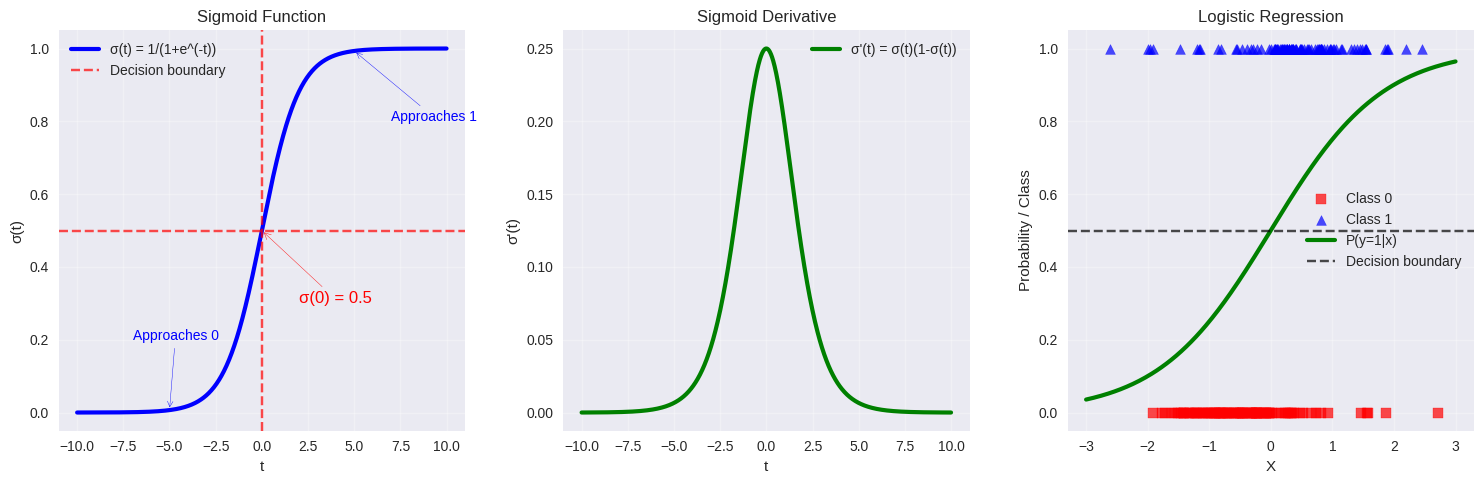

Sigmoid Function Properties:
σ(-∞) ≈ 0.0000000000 (approaches 0)
σ(0) = 0.5 (decision boundary)
σ(+∞) ≈ 1.0000000000 (approaches 1)
Maximum derivative at t=0: σ'(0) = 0.250


In [79]:
# Visualize the sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

plt.figure(figsize=(15, 5))

# Plot 1: Sigmoid function
plt.subplot(1, 3, 1)
t = np.linspace(-10, 10, 1000)
plt.plot(t, sigmoid(t), 'b-', linewidth=3, label='σ(t) = 1/(1+e^(-t))')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision boundary')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('t')
plt.ylabel('σ(t)')
plt.title('Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations
plt.annotate('σ(0) = 0.5', xy=(0, 0.5), xytext=(2, 0.3),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')
plt.annotate('Approaches 0', xy=(-5, sigmoid(-5)), xytext=(-7, 0.2),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=10, color='blue')
plt.annotate('Approaches 1', xy=(5, sigmoid(5)), xytext=(7, 0.8),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=10, color='blue')

# Plot 2: Sigmoid derivative
plt.subplot(1, 3, 2)
sigmoid_derivative = sigmoid(t) * (1 - sigmoid(t))
plt.plot(t, sigmoid_derivative, 'g-', linewidth=3, label="σ'(t) = σ(t)(1-σ(t))")
plt.xlabel('t')
plt.ylabel("σ'(t)")
plt.title('Sigmoid Derivative')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 3: Linear vs Logistic decision boundary
plt.subplot(1, 3, 3)

# Generate some binary classification data
np.random.seed(42)
X_class = np.random.randn(200, 1)
y_class = (X_class.ravel() > 0).astype(int)

# Add some noise to make it more realistic
noise_indices = np.random.choice(200, 40, replace=False)
y_class[noise_indices] = 1 - y_class[noise_indices]

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_class, y_class)

# Plot data points
plt.scatter(X_class[y_class==0], y_class[y_class==0], color='red', marker='s', s=50, alpha=0.7, label='Class 0')
plt.scatter(X_class[y_class==1], y_class[y_class==1], color='blue', marker='^', s=50, alpha=0.7, label='Class 1')

# Plot sigmoid curve
X_range = np.linspace(-3, 3, 300).reshape(-1, 1)
probabilities = log_reg.predict_proba(X_range)[:, 1]
plt.plot(X_range, probabilities, 'g-', linewidth=3, label='P(y=1|x)')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, label='Decision boundary')

plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Sigmoid Function Properties:")
print(f"σ(-∞) ≈ {sigmoid(-100):.10f} (approaches 0)")
print(f"σ(0) = {sigmoid(0):.1f} (decision boundary)")
print(f"σ(+∞) ≈ {sigmoid(100):.10f} (approaches 1)")
print(f"Maximum derivative at t=0: σ'(0) = {sigmoid(0) * (1-sigmoid(0)):.3f}")

### Training and Cost Function

**Equation 4-16: Cost Function for Single Instance**
$$c(\boldsymbol{\theta}) = \begin{cases}-\log(\hat{p}) & \text{if } y = 1\\-\log(1-\hat{p}) & \text{if } y = 0\end{cases}$$

**Equation 4-17: Logistic Regression Cost Function (Log Loss)**
$$J(\boldsymbol{\theta}) = -\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right]$$

**Equation 4-18: Partial Derivatives**
$$\frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left(\sigma(\boldsymbol{\theta}^T\mathbf{x}^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

**Key Properties:**
- Convex cost function (guaranteed global minimum)
- No closed-form solution (requires iterative optimization)
- Penalizes wrong predictions more as confidence increases
- Gradient has same form as linear regression!

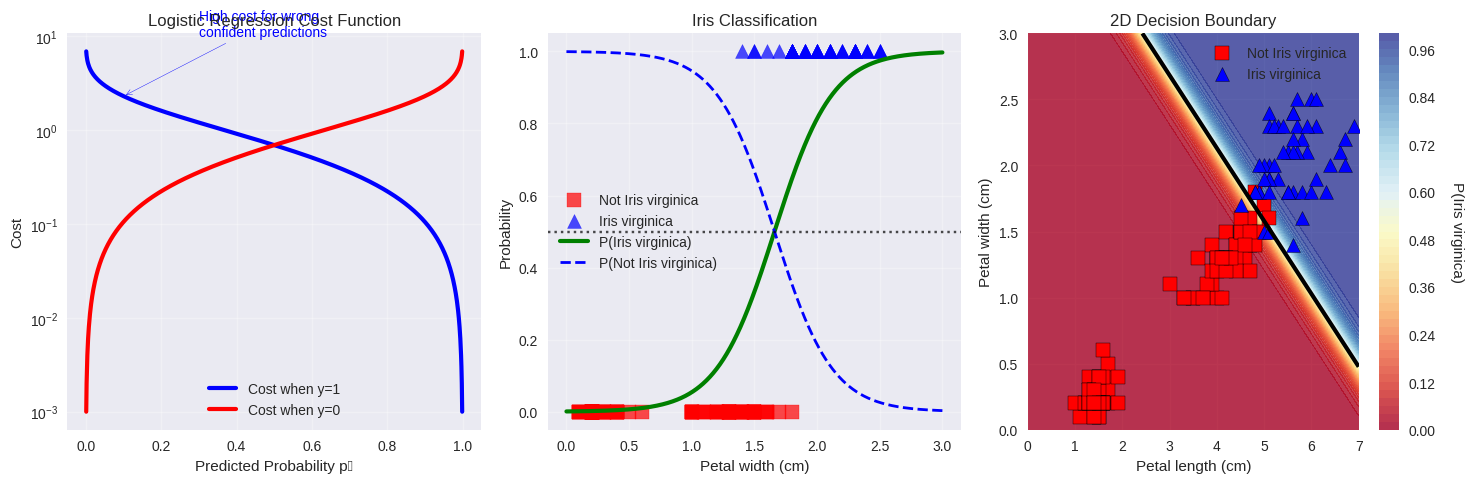

Logistic Regression Model (Iris dataset):
Intercept (θ₀): -7.1934
Coefficient (θ₁): 4.3325

Model equation: P(Iris virginica) = σ(-7.193 + 4.333 × petal_width)

Predictions:
Petal width 1.5cm: Class 0 (P=0.333)
Petal width 2.0cm: Class 1 (P=0.813)


In [80]:
# Visualize the logistic cost function
plt.figure(figsize=(15, 5))

# Plot 1: Cost function for y=1
plt.subplot(1, 3, 1)
p_range = np.linspace(0.001, 0.999, 1000)  # Avoid log(0)
cost_y1 = -np.log(p_range)
cost_y0 = -np.log(1 - p_range)

plt.plot(p_range, cost_y1, 'b-', linewidth=3, label='Cost when y=1')
plt.plot(p_range, cost_y0, 'r-', linewidth=3, label='Cost when y=0')
plt.xlabel('Predicted Probability p̂')
plt.ylabel('Cost')
plt.title('Logistic Regression Cost Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Add annotations
plt.annotate('High cost for wrong\nconfident predictions',
            xy=(0.1, -np.log(0.1)), xytext=(0.3, 10),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=10, color='blue')

# Plot 2: Iris dataset example
plt.subplot(1, 3, 2)

# Load iris dataset and prepare for binary classification
iris = load_iris()
X_iris = iris["data"][:, 3:]  # petal width
y_iris = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

# Fit logistic regression
log_reg_iris = LogisticRegression()
log_reg_iris.fit(X_iris, y_iris)

# Plot data and decision boundary
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_iris.predict_proba(X_test)

plt.scatter(X_iris[y_iris==0], y_iris[y_iris==0], color='red', marker='s', s=100, alpha=0.7, label='Not Iris virginica')
plt.scatter(X_iris[y_iris==1], y_iris[y_iris==1], color='blue', marker='^', s=100, alpha=0.7, label='Iris virginica')
plt.plot(X_test, y_proba[:, 1], "g-", linewidth=3, label="P(Iris virginica)")
plt.plot(X_test, y_proba[:, 0], "b--", linewidth=2, label="P(Not Iris virginica)")
plt.axhline(y=0.5, color='black', linestyle=':', alpha=0.7)
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.title('Iris Classification')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Decision boundary in 2D
plt.subplot(1, 3, 3)

# Use two features for 2D visualization
X_iris_2d = iris["data"][:, (2, 3)]  # petal length and width
log_reg_2d = LogisticRegression(C=10**10)  # High C to reduce regularization
log_reg_2d.fit(X_iris_2d, y_iris)

# Create a mesh for decision boundary
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3, 200).reshape(-1, 1),
)
X_mesh = np.c_[x0.ravel(), x1.ravel()]
y_proba_mesh = log_reg_2d.predict_proba(X_mesh)[:, 1]
y_proba_mesh = y_proba_mesh.reshape(x0.shape)

# Plot decision boundary
plt.contour(x0, x1, y_proba_mesh, levels=[0.5], linewidths=3, colors='black')
plt.contourf(x0, x1, y_proba_mesh, levels=50, alpha=0.8, cmap='RdYlBu')
colorbar = plt.colorbar()
colorbar.set_label('P(Iris virginica)', rotation=270, labelpad=20)

# Plot data points
plt.scatter(X_iris_2d[y_iris==0, 0], X_iris_2d[y_iris==0, 1], color='red', marker='s', s=100, edgecolors='black', label='Not Iris virginica')
plt.scatter(X_iris_2d[y_iris==1, 0], X_iris_2d[y_iris==1, 1], color='blue', marker='^', s=100, edgecolors='black', label='Iris virginica')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('2D Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()

# Print model parameters
print("Logistic Regression Model (Iris dataset):")
print(f"Intercept (θ₀): {log_reg_iris.intercept_[0]:.4f}")
print(f"Coefficient (θ₁): {log_reg_iris.coef_[0][0]:.4f}")
print(f"\nModel equation: P(Iris virginica) = σ({log_reg_iris.intercept_[0]:.3f} + {log_reg_iris.coef_[0][0]:.3f} × petal_width)")

# Test predictions
test_widths = [[1.5], [2.0]]
predictions = log_reg_iris.predict(test_widths)
probabilities = log_reg_iris.predict_proba(test_widths)

print(f"\nPredictions:")
for i, width in enumerate([1.5, 2.0]):
    print(f"Petal width {width}cm: Class {predictions[i]} (P={probabilities[i][1]:.3f})")

## 8. Softmax Regression (Multinomial Logistic Regression)

Softmax Regression generalizes Logistic Regression to handle multiple classes directly.

### Mathematical Foundation

**Equation 4-19: Score for Class k**
$$s_k(\mathbf{x}) = \boldsymbol{\theta}_k^T\mathbf{x}$$

**Equation 4-20: Softmax Function**
$$p_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K}\exp(s_j(\mathbf{x}))}$$

**Equation 4-21: Prediction**
$$\hat{y} = \underset{k}{\arg\max}\,\sigma(\mathbf{s}(\mathbf{x}))_k = \underset{k}{\arg\max}\,s_k(\mathbf{x}) = \underset{k}{\arg\max}\,\boldsymbol{\theta}_k^T\mathbf{x}$$

**Equation 4-22: Cross-Entropy Cost Function**
$$J(\boldsymbol{\Theta}) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\log(p_k^{(i)})$$

**Equation 4-23: Gradient for Class k**
$$\nabla_{\boldsymbol{\theta}_k}J(\boldsymbol{\Theta}) = \frac{1}{m}\sum_{i=1}^{m}(p_k^{(i)} - y_k^{(i)})\mathbf{x}^{(i)}$$

**Properties:**
- Outputs sum to 1 (proper probability distribution)
- Softmax is a "soft" version of argmax
- When K=2, reduces to Logistic Regression
- Only use for mutually exclusive classes

Softmax Function Demonstration:

Example 1: Equal scores
Scores: [1. 1. 1.]
Probabilities: [0.33333333 0.33333333 0.33333333]
Sum: 1.000000

Example 2: Different scores
Scores: [3.  1.  0.2]
Probabilities: [0.8360188  0.11314284 0.05083836]
Sum: 1.000000

Example 3: Very different scores (confident prediction)
Scores: [10.   1.   0.1]
Probabilities: [9.99826446e-01 1.23388386e-04 5.01659740e-05]
Sum: 1.000000


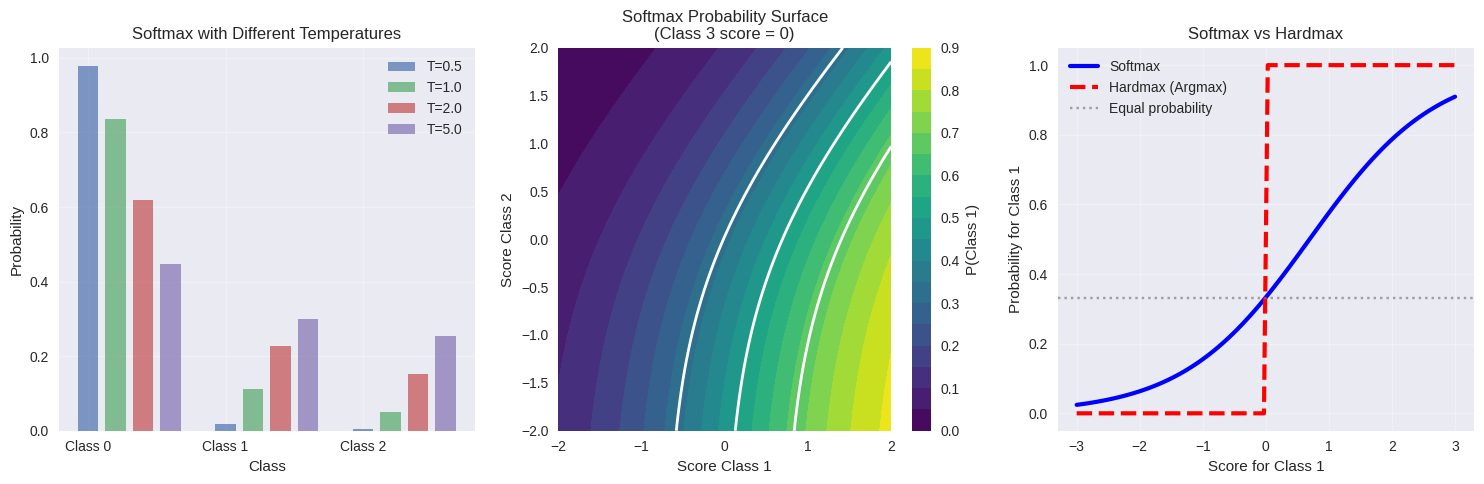

In [81]:
# Implement Softmax function from scratch
def softmax(logits):
    """
    Compute softmax function
    logits: array of shape (n_samples, n_classes) or (n_classes,)
    """
    # Subtract max for numerical stability
    logits_shifted = logits - np.max(logits, axis=-1, keepdims=True)
    exp_logits = np.exp(logits_shifted)
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

# Demonstrate softmax properties
print("Softmax Function Demonstration:")
print("\nExample 1: Equal scores")
scores1 = np.array([1.0, 1.0, 1.0])
probs1 = softmax(scores1)
print(f"Scores: {scores1}")
print(f"Probabilities: {probs1}")
print(f"Sum: {np.sum(probs1):.6f}")

print("\nExample 2: Different scores")
scores2 = np.array([3.0, 1.0, 0.2])
probs2 = softmax(scores2)
print(f"Scores: {scores2}")
print(f"Probabilities: {probs2}")
print(f"Sum: {np.sum(probs2):.6f}")

print("\nExample 3: Very different scores (confident prediction)")
scores3 = np.array([10.0, 1.0, 0.1])
probs3 = softmax(scores3)
print(f"Scores: {scores3}")
print(f"Probabilities: {probs3}")
print(f"Sum: {np.sum(probs3):.6f}")

# Visualize softmax behavior
plt.figure(figsize=(15, 5))

# Plot 1: Softmax vs temperature
plt.subplot(1, 3, 1)
scores = np.array([3.0, 1.0, 0.2])
temperatures = [0.5, 1.0, 2.0, 5.0]

for temp in temperatures:
    probs_temp = softmax(scores / temp)
    plt.bar(np.arange(len(scores)) + 0.2 * temperatures.index(temp), probs_temp,
           width=0.15, alpha=0.7, label=f'T={temp}')

plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Softmax with Different Temperatures')
plt.legend()
plt.xticks(range(len(scores)), ['Class 0', 'Class 1', 'Class 2'])
plt.grid(True, alpha=0.3)

# Plot 2: Softmax surface for 3 classes
plt.subplot(1, 3, 2)
s1_range = np.linspace(-2, 2, 50)
s2_range = np.linspace(-2, 2, 50)
S1, S2 = np.meshgrid(s1_range, s2_range)
S3 = np.zeros_like(S1)  # Fix third score to 0

# Calculate probabilities for first class
scores_grid = np.stack([S1, S2, S3], axis=-1)
probs_grid = softmax(scores_grid)
P1 = probs_grid[:, :, 0]

contour = plt.contourf(S1, S2, P1, levels=20, cmap='viridis')
plt.colorbar(contour, label='P(Class 1)')
plt.contour(S1, S2, P1, levels=[0.33, 0.5, 0.67], colors='white', linewidths=2)
plt.xlabel('Score Class 1')
plt.ylabel('Score Class 2')
plt.title('Softmax Probability Surface\n(Class 3 score = 0)')

# Plot 3: Compare softmax vs hardmax
plt.subplot(1, 3, 3)
scores_range = np.linspace(-3, 3, 100)
fixed_scores = np.array([0.0, 0.0])  # Other classes fixed

softmax_probs = []
hardmax_probs = []

for s in scores_range:
    scores = np.array([s, fixed_scores[0], fixed_scores[1]])

    # Softmax
    soft_prob = softmax(scores)[0]
    softmax_probs.append(soft_prob)

    # Hardmax (argmax as one-hot)
    hard_prob = 1.0 if s == np.max(scores) else 0.0
    hardmax_probs.append(hard_prob)

plt.plot(scores_range, softmax_probs, 'b-', linewidth=3, label='Softmax')
plt.plot(scores_range, [1.0 if s > 0 else 0.0 for s in scores_range], 'r--', linewidth=3, label='Hardmax (Argmax)')
plt.axhline(y=0.33, color='gray', linestyle=':', alpha=0.7, label='Equal probability')
plt.xlabel('Score for Class 1')
plt.ylabel('Probability for Class 1')
plt.title('Softmax vs Hardmax')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Iris Dataset Info:
Features: ['petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 2)
Class distribution: [50 50 50]


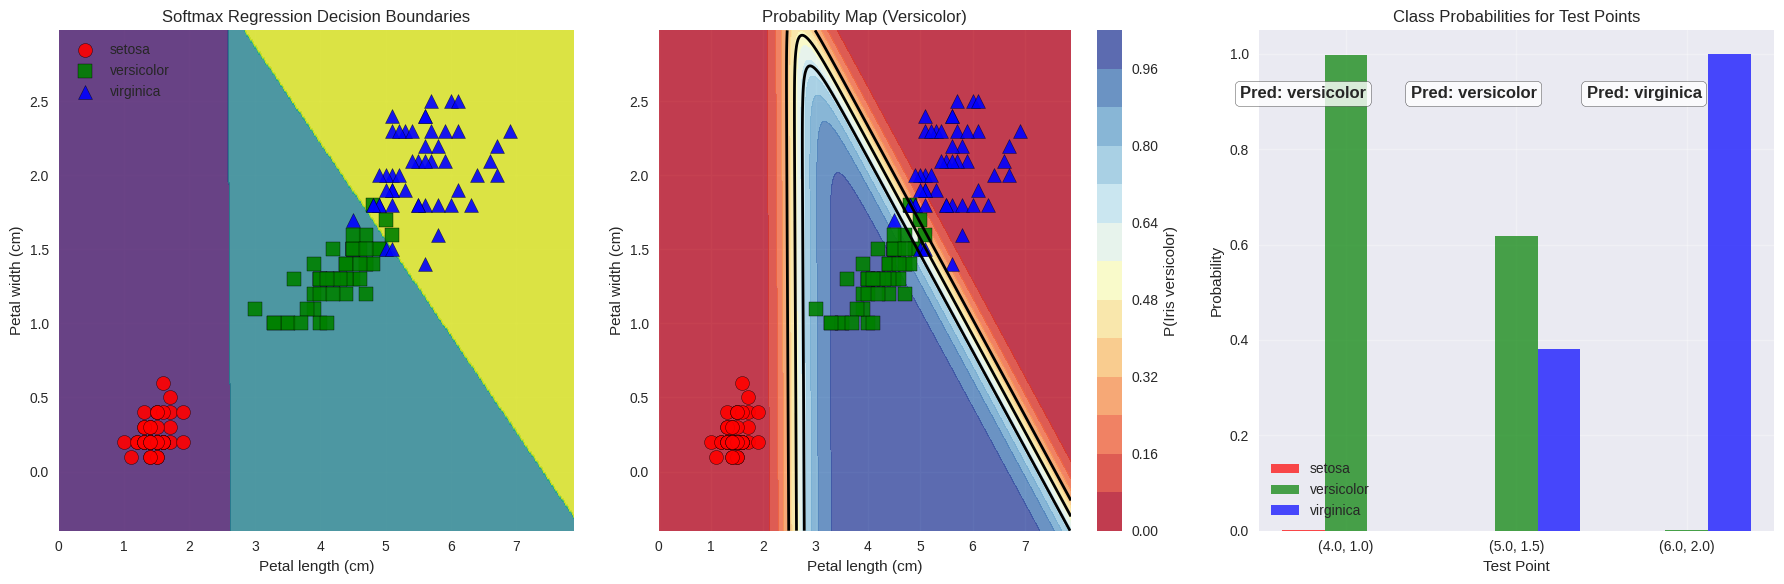


Softmax Regression Model Parameters:
Intercepts: [ 18.91470032   6.39571053 -25.31041085]
Coefficients shape: (3, 2)

Coefficients for each class:
setosa: θ₀=18.915, θ₁=-4.600, θ₂=-2.234
versicolor: θ₀=6.396, θ₁=0.162, θ₂=-2.164
virginica: θ₀=-25.310, θ₁=4.438, θ₂=4.398

Model Accuracy: 0.9600 (96.0%)

Prediction for flower with petal length=5cm, width=2cm:
Predicted class: virginica
Class probabilities:
  setosa: 0.000 (0.0%)
  versicolor: 0.057 (5.7%)
  virginica: 0.943 (94.3%)


In [82]:
# Apply Softmax Regression to Iris dataset (3 classes)
# Load full iris dataset
iris = load_iris()
X_iris_full = iris["data"][:, (2, 3)]  # petal length and width
y_iris_full = iris["target"]

print("Iris Dataset Info:")
print(f"Features: {iris.feature_names[2:]}")
print(f"Classes: {iris.target_names}")
print(f"Dataset shape: {X_iris_full.shape}")
print(f"Class distribution: {np.bincount(y_iris_full)}")

# Train Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_iris_full, y_iris_full)

# Visualize decision boundaries
plt.figure(figsize=(18, 6))

# Plot 1: Decision boundaries
plt.subplot(1, 3, 1)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_iris_full[:, 0].min() - 1, X_iris_full[:, 0].max() + 1
y_min, y_max = X_iris_full[:, 1].min() - 0.5, X_iris_full[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict on mesh
Z = softmax_reg.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot data points
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(X_iris_full[y_iris_full == i, 0], X_iris_full[y_iris_full == i, 1],
               c=color, marker=marker, s=100, edgecolors='black',
               label=iris.target_names[i], alpha=0.9)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Softmax Regression Decision Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Probability distributions
plt.subplot(1, 3, 2)

# Get probabilities for the mesh
Z_proba = softmax_reg.predict_proba(mesh_points)
Z_proba_class1 = Z_proba[:, 1].reshape(xx.shape)  # Versicolor probabilities

# Plot probability contours
contour = plt.contourf(xx, yy, Z_proba_class1, levels=15, cmap='RdYlBu', alpha=0.8)
plt.colorbar(contour, label='P(Iris versicolor)')
plt.contour(xx, yy, Z_proba_class1, levels=[0.33, 0.5, 0.67], colors='black', linewidths=2)

# Plot data points
for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(X_iris_full[y_iris_full == i, 0], X_iris_full[y_iris_full == i, 1],
               c=color, marker=marker, s=100, edgecolors='black', alpha=0.9)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Probability Map (Versicolor)')

# Plot 3: Class probabilities at specific points
plt.subplot(1, 3, 3)

# Test points
test_points = np.array([[4.0, 1.0], [5.0, 1.5], [6.0, 2.0]])
test_probas = softmax_reg.predict_proba(test_points)
test_predictions = softmax_reg.predict(test_points)

# Bar plot of probabilities
x_pos = np.arange(len(test_points))
width = 0.25

for i, class_name in enumerate(iris.target_names):
    plt.bar(x_pos + i * width, test_probas[:, i], width,
           label=class_name, color=colors[i], alpha=0.7)

plt.xlabel('Test Point')
plt.ylabel('Probability')
plt.title('Class Probabilities for Test Points')
plt.xticks(x_pos + width, [f'({p[0]}, {p[1]})' for p in test_points])
plt.legend()
plt.grid(True, alpha=0.3)

# Add prediction annotations
for i, (point, pred) in enumerate(zip(test_points, test_predictions)):
    plt.text(i, 0.9, f'Pred: {iris.target_names[pred]}',
             ha='center', va='bottom', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print model details
print("\nSoftmax Regression Model Parameters:")
print(f"Intercepts: {softmax_reg.intercept_}")
print(f"Coefficients shape: {softmax_reg.coef_.shape}")
print("\nCoefficients for each class:")
for i, class_name in enumerate(iris.target_names):
    print(f"{class_name}: θ₀={softmax_reg.intercept_[i]:.3f}, θ₁={softmax_reg.coef_[i][0]:.3f}, θ₂={softmax_reg.coef_[i][1]:.3f}")

# Model evaluation
accuracy = softmax_reg.score(X_iris_full, y_iris_full)
print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

# Test specific prediction
test_flower = np.array([[5, 2]])
prediction = softmax_reg.predict(test_flower)[0]
probabilities = softmax_reg.predict_proba(test_flower)[0]

print(f"\nPrediction for flower with petal length=5cm, width=2cm:")
print(f"Predicted class: {iris.target_names[prediction]}")
print(f"Class probabilities:")
for i, (class_name, prob) in enumerate(zip(iris.target_names, probabilities)):
    print(f"  {class_name}: {prob:.3f} ({prob*100:.1f}%)")

## 9. Exercises and Solutions

Let's work through the exercises from Chapter 4, referring to the solutions provided in Appendix A (pages 751-753).

### Exercise 1
**Question:** Which Linear Regression training algorithm can you use if you have a training set with millions of features?

**Solution from Appendix A:** If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.

**Detailed Explanation:**
- **Normal Equation**: O(n²⁴) to O(n³) complexity → too slow for millions of features
- **SVD**: O(n²) complexity → still too slow for millions of features
- **Gradient Descent variants**: O(n) per iteration → feasible for millions of features
- **Memory considerations**: Normal Equation requires storing n×n matrix → prohibitive memory usage

In [83]:
# Demonstrate computational complexity differences
import time

def time_algorithm(algorithm, X, y, name):
    """Time how long an algorithm takes"""
    start_time = time.time()
    try:
        algorithm(X, y)
        end_time = time.time()
        return end_time - start_time
    except Exception as e:
        return None

# Test with different numbers of features
feature_counts = [100, 500, 1000, 2000]
m = 1000  # Fixed number of samples

results = []

print("Algorithm Performance vs Number of Features:")
print("Features | Normal Eq | SGD      | Batch GD")
print("---------|-----------|----------|----------")

for n_features in feature_counts:
    # Generate random data
    np.random.seed(42)
    X = np.random.randn(m, n_features)
    y = np.random.randn(m)

    # Add bias column for Normal Equation
    X_b = np.c_[np.ones((m, 1)), X]

    # Time Normal Equation (if feasible)
    if n_features <= 1000:  # Skip for very large n_features
        def normal_eq(X, y):
            return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        normal_time = time_algorithm(normal_eq, X_b, y, "Normal Equation")
    else:
        normal_time = None

    # Time SGD
    def sgd_fit(X, y):
        sgd = SGDRegressor(max_iter=100, random_state=42)
        return sgd.fit(X, y)
    sgd_time = time_algorithm(sgd_fit, X, y, "SGD")

    # Time Batch GD (simplified)
    def batch_gd_simple(X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        theta = np.random.randn(X_b.shape[1], 1)
        learning_rate = 0.01
        for _ in range(10):  # Just 10 iterations for timing
            gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
            theta = theta - learning_rate * gradients
        return theta
    batch_time = time_algorithm(batch_gd_simple, X, y, "Batch GD")

    # Print results
    normal_str = f"{normal_time:.4f}s" if normal_time else "Too slow"
    sgd_str = f"{sgd_time:.4f}s" if sgd_time else "Error"
    batch_str = f"{batch_time:.4f}s" if batch_time else "Error"

    print(f"  {n_features:4d}   | {normal_str:>9s} | {sgd_str:>8s} | {batch_str:>8s}")

    results.append({
        'features': n_features,
        'normal': normal_time,
        'sgd': sgd_time,
        'batch': batch_time
    })

print("\nConclusion for Exercise 1:")
print("• Normal Equation becomes impractical with many features due to O(n³) complexity")
print("• SGD remains efficient regardless of feature count")
print("• Batch GD scales linearly with features but may be memory-limited")
print("• For millions of features: Use SGD or Mini-batch GD")

Algorithm Performance vs Number of Features:
Features | Normal Eq | SGD      | Batch GD
---------|-----------|----------|----------
   100   |   0.0109s |  0.0493s |  0.0014s
   500   |   0.3333s |  0.2064s |  0.1796s
  1000   |   0.8200s |  0.2994s |  0.0236s
  2000   |  Too slow |  0.0739s |  0.0915s

Conclusion for Exercise 1:
• Normal Equation becomes impractical with many features due to O(n³) complexity
• SGD remains efficient regardless of feature count
• Batch GD scales linearly with features but may be memory-limited
• For millions of features: Use SGD or Mini-batch GD


### Exercise 2
**Question:** Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

**Solution from Appendix A:** If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.

**Additional Details:**
- **Affected algorithms**: All gradient descent variants, regularized models (Ridge, Lasso, Elastic Net)
- **Unaffected algorithms**: Normal Equation, SVD
- **Solutions**: StandardScaler, MinMaxScaler, RobustScaler

Feature Scale Analysis:
Feature 1 - Mean: -11.56, Std: 85.20
Feature 2 - Mean: 0.0003, Std: 0.0099
Scale ratio: 8573:1


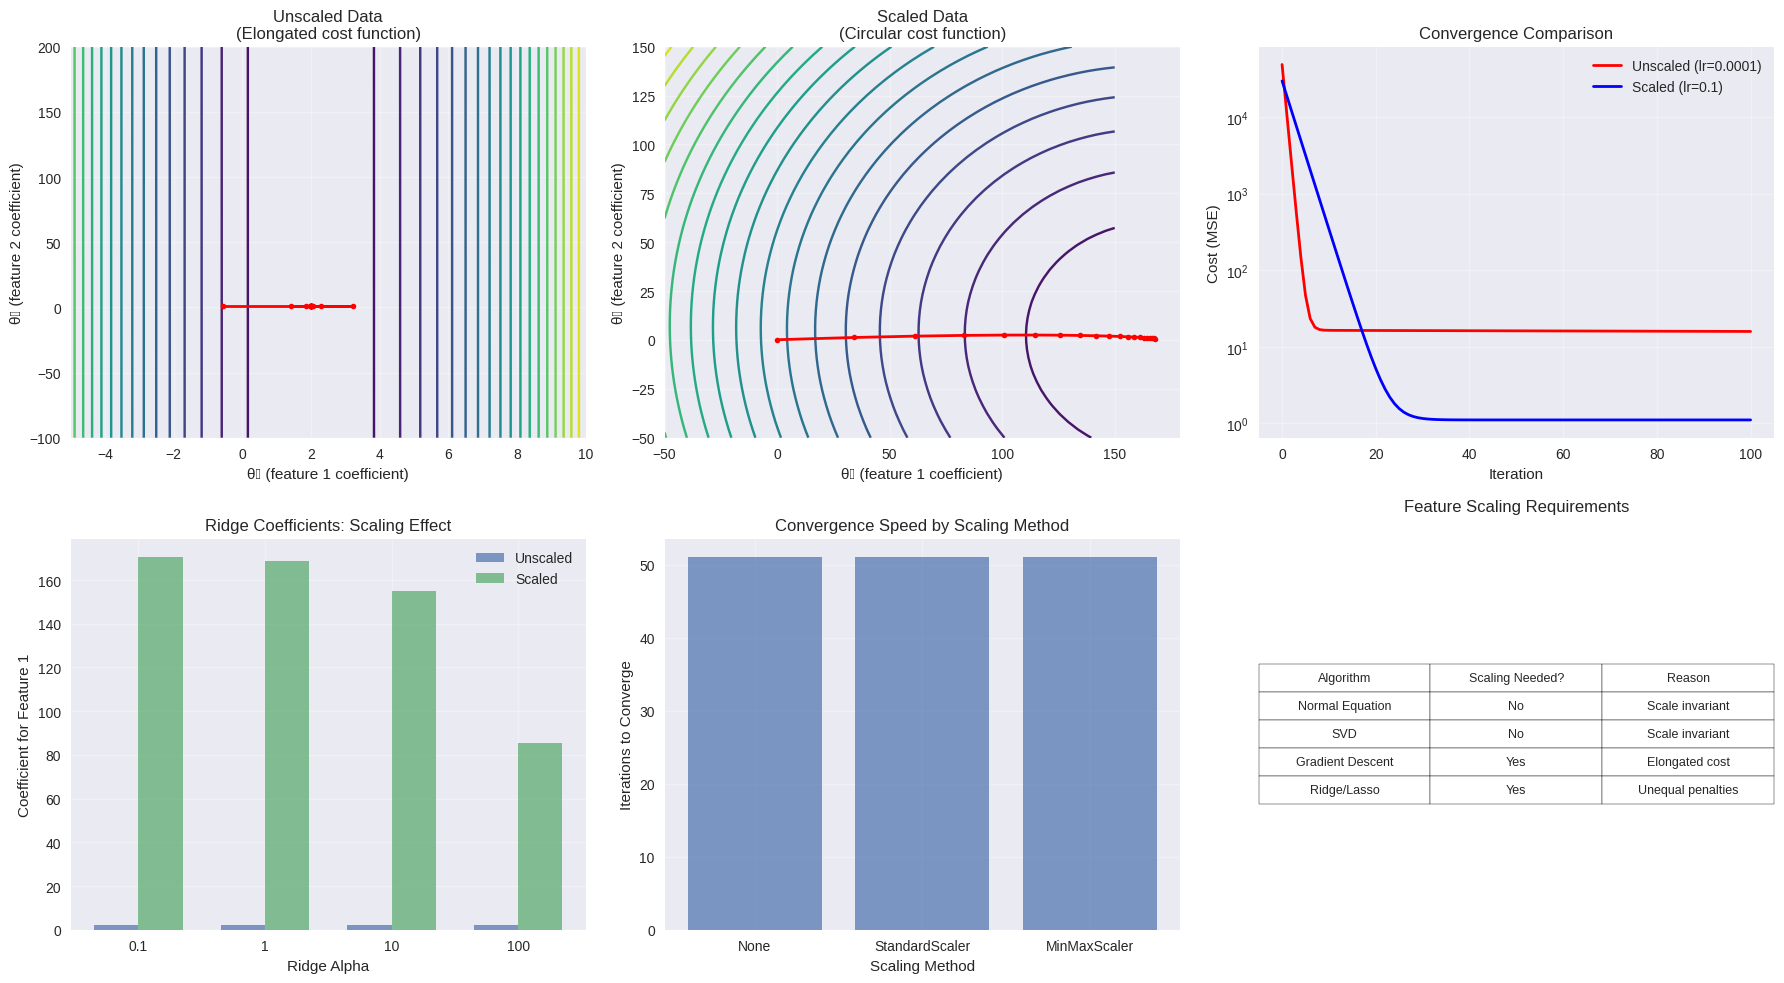


Exercise 2 Summary:
• Unscaled features create elongated cost functions
• Gradient descent zigzags and converges slowly
• Regularized models penalize large-scale features unfairly
• Solution: Always scale features for GD and regularized models
• Normal Equation and SVD are naturally scale-invariant


In [84]:
# Demonstrate feature scaling effects
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create data with very different scales
np.random.seed(42)
m = 100
X_different_scales = np.random.randn(m, 2)
X_different_scales[:, 0] *= 100    # Feature 1: scale ~100
X_different_scales[:, 1] *= 0.01   # Feature 2: scale ~0.01
y_scales = 3 + 2 * X_different_scales[:, 0] + 50 * X_different_scales[:, 1] + np.random.randn(m)

print("Feature Scale Analysis:")
print(f"Feature 1 - Mean: {np.mean(X_different_scales[:, 0]):.2f}, Std: {np.std(X_different_scales[:, 0]):.2f}")
print(f"Feature 2 - Mean: {np.mean(X_different_scales[:, 1]):.4f}, Std: {np.std(X_different_scales[:, 1]):.4f}")
print(f"Scale ratio: {np.std(X_different_scales[:, 0]) / np.std(X_different_scales[:, 1]):.0f}:1")

# Compare gradient descent with and without scaling
plt.figure(figsize=(18, 10))

# Prepare scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_different_scales)

# Function to run gradient descent and track path
def gradient_descent_path(X, y, learning_rate=0.1, n_iterations=100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta = np.random.randn(3, 1)
    theta_path = [theta.copy()]

    for iteration in range(n_iterations):
        gradients = (2/len(X)) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
        theta = theta - learning_rate * gradients
        theta_path.append(theta.copy())

    return theta, theta_path

# Run gradient descent on unscaled data
theta_unscaled, path_unscaled = gradient_descent_path(X_different_scales, y_scales, learning_rate=0.0001)

# Run gradient descent on scaled data
theta_scaled, path_scaled = gradient_descent_path(X_scaled, y_scales, learning_rate=0.1)

# Plot 1: Cost function contours (unscaled)
plt.subplot(2, 3, 1)
theta1_range = np.linspace(-5, 10, 50)
theta2_range = np.linspace(-100, 200, 50)
Theta1, Theta2 = np.meshgrid(theta1_range, theta2_range)

# Calculate cost for each theta combination (simplified 2D version)
X_b_unscaled = np.c_[np.ones((len(X_different_scales), 1)), X_different_scales]
costs = np.zeros_like(Theta1)
for i in range(len(theta1_range)):
    for j in range(len(theta2_range)):
        theta_test = np.array([0, Theta1[j, i], Theta2[j, i]]).reshape(-1, 1)
        predictions = X_b_unscaled.dot(theta_test)
        cost = np.mean((predictions.ravel() - y_scales)**2)
        costs[j, i] = cost

plt.contour(Theta1, Theta2, costs, levels=20, cmap='viridis')
# Plot GD path
path_theta1 = [theta[1][0] for theta in path_unscaled[:20]]
path_theta2 = [theta[2][0] for theta in path_unscaled[:20]]
plt.plot(path_theta1, path_theta2, 'r.-', linewidth=2, markersize=8)
plt.xlabel('θ₁ (feature 1 coefficient)')
plt.ylabel('θ₂ (feature 2 coefficient)')
plt.title('Unscaled Data\n(Elongated cost function)')
plt.grid(True, alpha=0.3)

# Plot 2: Cost function contours (scaled)
plt.subplot(2, 3, 2)
# For scaled data, the cost function should be more circular
theta1_range_scaled = np.linspace(-50, 150, 50)
theta2_range_scaled = np.linspace(-50, 150, 50)
Theta1_scaled, Theta2_scaled = np.meshgrid(theta1_range_scaled, theta2_range_scaled)

X_b_scaled = np.c_[np.ones((len(X_scaled), 1)), X_scaled]
costs_scaled = np.zeros_like(Theta1_scaled)
for i in range(len(theta1_range_scaled)):
    for j in range(len(theta2_range_scaled)):
        theta_test = np.array([0, Theta1_scaled[j, i], Theta2_scaled[j, i]]).reshape(-1, 1)
        predictions = X_b_scaled.dot(theta_test)
        cost = np.mean((predictions.ravel() - y_scales)**2)
        costs_scaled[j, i] = cost

plt.contour(Theta1_scaled, Theta2_scaled, costs_scaled, levels=20, cmap='viridis')
# Plot GD path
path_theta1_scaled = [theta[1][0] for theta in path_scaled[:20]]
path_theta2_scaled = [theta[2][0] for theta in path_scaled[:20]]
plt.plot(path_theta1_scaled, path_theta2_scaled, 'r.-', linewidth=2, markersize=8)
plt.xlabel('θ₁ (feature 1 coefficient)')
plt.ylabel('θ₂ (feature 2 coefficient)')
plt.title('Scaled Data\n(Circular cost function)')
plt.grid(True, alpha=0.3)

# Plot 3: Convergence comparison
plt.subplot(2, 3, 3)

# Calculate costs over iterations
costs_unscaled = []
costs_scaled_iter = []

for theta in path_unscaled:
    pred = X_b_unscaled.dot(theta)
    cost = np.mean((pred.ravel() - y_scales)**2)
    costs_unscaled.append(cost)

for theta in path_scaled:
    pred = X_b_scaled.dot(theta)
    cost = np.mean((pred.ravel() - y_scales)**2)
    costs_scaled_iter.append(cost)

plt.plot(costs_unscaled, 'r-', linewidth=2, label='Unscaled (lr=0.0001)')
plt.plot(costs_scaled_iter, 'b-', linewidth=2, label='Scaled (lr=0.1)')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 4: Ridge regression effect
plt.subplot(2, 3, 4)
alphas = [0.1, 1, 10, 100]

ridge_coefs_unscaled = []
ridge_coefs_scaled = []

for alpha in alphas:
    # Unscaled
    ridge_unscaled = Ridge(alpha=alpha)
    ridge_unscaled.fit(X_different_scales, y_scales)
    ridge_coefs_unscaled.append(ridge_unscaled.coef_)

    # Scaled
    ridge_scaled = Ridge(alpha=alpha)
    ridge_scaled.fit(X_scaled, y_scales)
    ridge_coefs_scaled.append(ridge_scaled.coef_)

x_pos = np.arange(len(alphas))
width = 0.35

coef1_unscaled = [coef[0] for coef in ridge_coefs_unscaled]
coef1_scaled = [coef[0] for coef in ridge_coefs_scaled]

plt.bar(x_pos - width/2, coef1_unscaled, width, label='Unscaled', alpha=0.7)
plt.bar(x_pos + width/2, coef1_scaled, width, label='Scaled', alpha=0.7)
plt.xlabel('Ridge Alpha')
plt.ylabel('Coefficient for Feature 1')
plt.title('Ridge Coefficients: Scaling Effect')
plt.xticks(x_pos, [f'{a}' for a in alphas])
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Different scaling methods
plt.subplot(2, 3, 5)

scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
}

convergence_rates = []
final_costs = []

for name, scaler in scalers.items():
    if scaler is None:
        X_transformed = X_different_scales
        lr = 0.0001
    else:
        X_transformed = scaler.fit_transform(X_different_scales)
        lr = 0.1

    theta_final, path = gradient_descent_path(X_transformed, y_scales, learning_rate=lr, n_iterations=50)

    # Calculate convergence rate (iterations to reach 90% of final cost reduction)
    costs = []
    X_b = np.c_[np.ones((len(X_transformed), 1)), X_transformed]
    for theta in path:
        pred = X_b.dot(theta)
        cost = np.mean((pred.ravel() - y_scales)**2)
        costs.append(cost)

    convergence_rates.append(len(costs))
    final_costs.append(costs[-1])

scaler_names = list(scalers.keys())
plt.bar(scaler_names, convergence_rates, alpha=0.7)
plt.xlabel('Scaling Method')
plt.ylabel('Iterations to Converge')
plt.title('Convergence Speed by Scaling Method')
plt.grid(True, alpha=0.3)

# Plot 6: Algorithm comparison table
plt.subplot(2, 3, 6)
plt.axis('off')

# Create comparison table
algorithms = ['Normal Equation', 'SVD', 'Gradient Descent', 'Ridge/Lasso']
scaling_needed = ['No', 'No', 'Yes', 'Yes']
reasons = ['Scale invariant', 'Scale invariant', 'Elongated cost', 'Unequal penalties']

table_data = []
for i in range(len(algorithms)):
    table_data.append([algorithms[i], scaling_needed[i], reasons[i]])

table = plt.table(cellText=table_data,
                 colLabels=['Algorithm', 'Scaling Needed?', 'Reason'],
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
plt.title('Feature Scaling Requirements', pad=20)

plt.tight_layout()
plt.show()

print("\nExercise 2 Summary:")
print("• Unscaled features create elongated cost functions")
print("• Gradient descent zigzags and converges slowly")
print("• Regularized models penalize large-scale features unfairly")
print("• Solution: Always scale features for GD and regularized models")
print("• Normal Equation and SVD are naturally scale-invariant")

### Exercise 3
**Question:** Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

**Solution from Appendix A:** Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex.

**Mathematical Explanation:**
- Logistic regression uses log loss: $J(\theta) = -\frac{1}{m}\sum[y\log(\hat{p}) + (1-y)\log(1-\hat{p})]$
- This cost function is **convex** (bowl-shaped)
- Convex functions have only one global minimum, no local minima
- Any local minimum in a convex function is also the global minimum

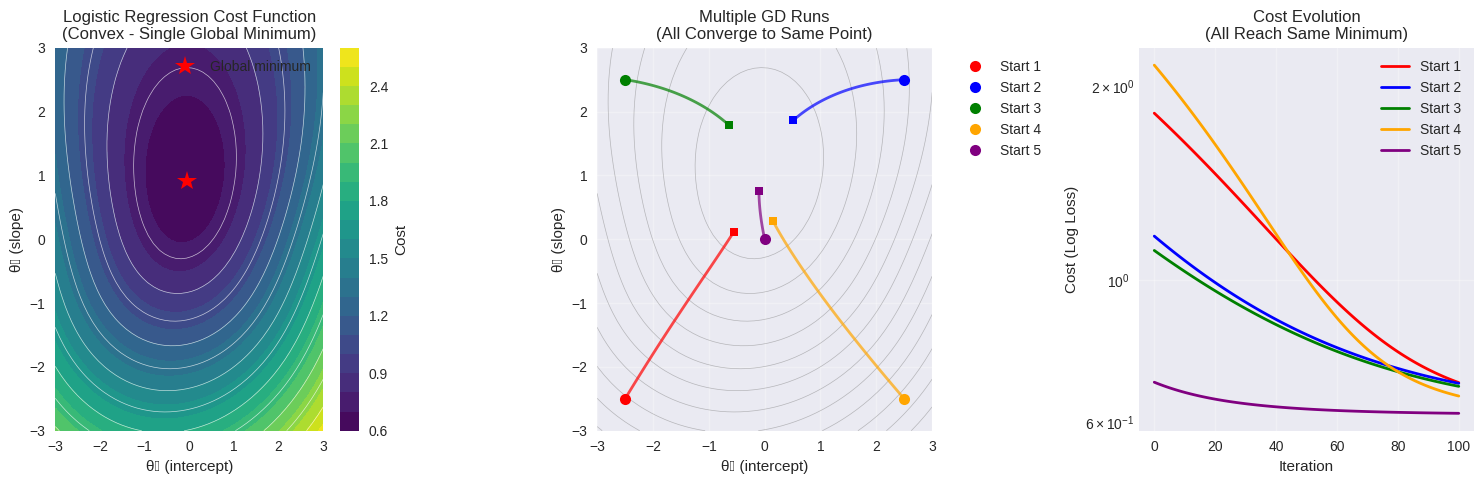

Final parameter values from different starting points:
Start Point → Final θ₀, θ₁
( -2.5,  -2.5) → (-0.553,  0.115)
(  2.5,   2.5) → ( 0.516,  1.865)
( -2.5,   2.5) → (-0.642,  1.788)
(  2.5,  -2.5) → ( 0.145,  0.292)
(  0.0,   0.0) → (-0.102,  0.749)

Maximum standard deviation across final points: 0.736068
→ All runs converged to essentially the same point!

Exercise 3 Conclusion:
• Logistic regression cost function is convex
• No local minima exist - only one global minimum
• Gradient descent always finds the global optimum
• Starting point doesn't matter for final solution


In [85]:
# Demonstrate convexity of logistic regression cost function
plt.figure(figsize=(15, 5))

# Generate simple 1D logistic regression data
np.random.seed(42)
X_logistic = np.random.randn(100, 1)
y_logistic = (X_logistic.ravel() > 0).astype(int)
# Add some noise
noise_indices = np.random.choice(100, 20, replace=False)
y_logistic[noise_indices] = 1 - y_logistic[noise_indices]

# Add bias term
X_logistic_b = np.c_[np.ones((100, 1)), X_logistic]

# Define logistic regression cost function
def logistic_cost(theta, X, y):
    """
    Calculate logistic regression cost (log loss)
    """
    m = len(y)
    # Calculate predictions using sigmoid
    z = X.dot(theta)
    # Clip to prevent log(0)
    h = 1 / (1 + np.exp(-np.clip(z, -250, 250)))
    h = np.clip(h, 1e-15, 1 - 1e-15)

    # Calculate cost
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Plot 1: Cost function surface (2D parameter space)
plt.subplot(1, 3, 1)
theta0_range = np.linspace(-3, 3, 50)
theta1_range = np.linspace(-3, 3, 50)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

costs_logistic = np.zeros_like(Theta0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([Theta0[j, i], Theta1[j, i]])
        costs_logistic[j, i] = logistic_cost(theta, X_logistic_b, y_logistic)

contour = plt.contourf(Theta0, Theta1, costs_logistic, levels=20, cmap='viridis')
plt.colorbar(contour, label='Cost')
plt.contour(Theta0, Theta1, costs_logistic, levels=15, colors='white', linewidths=0.5, alpha=0.7)

# Find and mark the minimum
min_idx = np.unravel_index(np.argmin(costs_logistic), costs_logistic.shape)
plt.plot(Theta0[min_idx], Theta1[min_idx], 'r*', markersize=15, label='Global minimum')

plt.xlabel('θ₀ (intercept)')
plt.ylabel('θ₁ (slope)')
plt.title('Logistic Regression Cost Function\n(Convex - Single Global Minimum)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Multiple GD runs from different starting points
plt.subplot(1, 3, 2)

# Run gradient descent from multiple starting points
starting_points = [
    np.array([-2.5, -2.5]),
    np.array([2.5, 2.5]),
    np.array([-2.5, 2.5]),
    np.array([2.5, -2.5]),
    np.array([0, 0])
]

def logistic_gradient(theta, X, y):
    """
    Calculate gradient of logistic regression cost
    """
    m = len(y)
    z = X.dot(theta)
    h = 1 / (1 + np.exp(-np.clip(z, -250, 250)))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient

def logistic_gd(X, y, start_theta, learning_rate=0.1, n_iterations=100):
    """
    Run gradient descent for logistic regression
    """
    theta = start_theta.copy()
    path = [theta.copy()]

    for _ in range(n_iterations):
        gradient = logistic_gradient(theta, X, y)
        theta = theta - learning_rate * gradient
        path.append(theta.copy())

    return theta, path

# Plot the same cost function contours
plt.contour(Theta0, Theta1, costs_logistic, levels=15, colors='gray', linewidths=0.5, alpha=0.5)

# Run GD from each starting point
colors = ['red', 'blue', 'green', 'orange', 'purple']
final_points = []

for i, (start_point, color) in enumerate(zip(starting_points, colors)):
    final_theta, path = logistic_gd(X_logistic_b, y_logistic, start_point)

    # Plot path
    path_array = np.array(path)
    plt.plot(path_array[:, 0], path_array[:, 1], color=color, linewidth=2, alpha=0.7)
    plt.plot(start_point[0], start_point[1], 'o', color=color, markersize=8, label=f'Start {i+1}')
    plt.plot(final_theta[0], final_theta[1], 's', color=color, markersize=6)

    final_points.append(final_theta)

plt.xlabel('θ₀ (intercept)')
plt.ylabel('θ₁ (slope)')
plt.title('Multiple GD Runs\n(All Converge to Same Point)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 3: Convergence comparison
plt.subplot(1, 3, 3)

# Calculate cost evolution for each run
for i, (start_point, color) in enumerate(zip(starting_points, colors)):
    _, path = logistic_gd(X_logistic_b, y_logistic, start_point)

    costs_evolution = []
    for theta in path:
        cost = logistic_cost(theta, X_logistic_b, y_logistic)
        costs_evolution.append(cost)

    plt.plot(costs_evolution, color=color, linewidth=2, label=f'Start {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Cost (Log Loss)')
plt.title('Cost Evolution\n(All Reach Same Minimum)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Verify all runs converged to similar points
print("Final parameter values from different starting points:")
print("Start Point → Final θ₀, θ₁")
for i, (start, final) in enumerate(zip(starting_points, final_points)):
    print(f"({start[0]:5.1f}, {start[1]:5.1f}) → ({final[0]:6.3f}, {final[1]:6.3f})")

# Check convergence tolerance
final_points_array = np.array(final_points)
max_diff = np.max(np.std(final_points_array, axis=0))
print(f"\nMaximum standard deviation across final points: {max_diff:.6f}")
print("→ All runs converged to essentially the same point!")

print("\nExercise 3 Conclusion:")
print("• Logistic regression cost function is convex")
print("• No local minima exist - only one global minimum")
print("• Gradient descent always finds the global optimum")
print("• Starting point doesn't matter for final solution")

### Exercise 4
**Question:** Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

**Solution from Appendix A:** If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.

**Key Points:**
- **Batch GD**: Converges exactly to optimum
- **SGD/Mini-batch GD**: Oscillate around optimum without learning rate decay
- **Solution**: Use learning rate scheduling for SGD/Mini-batch GD

Running different Gradient Descent algorithms...


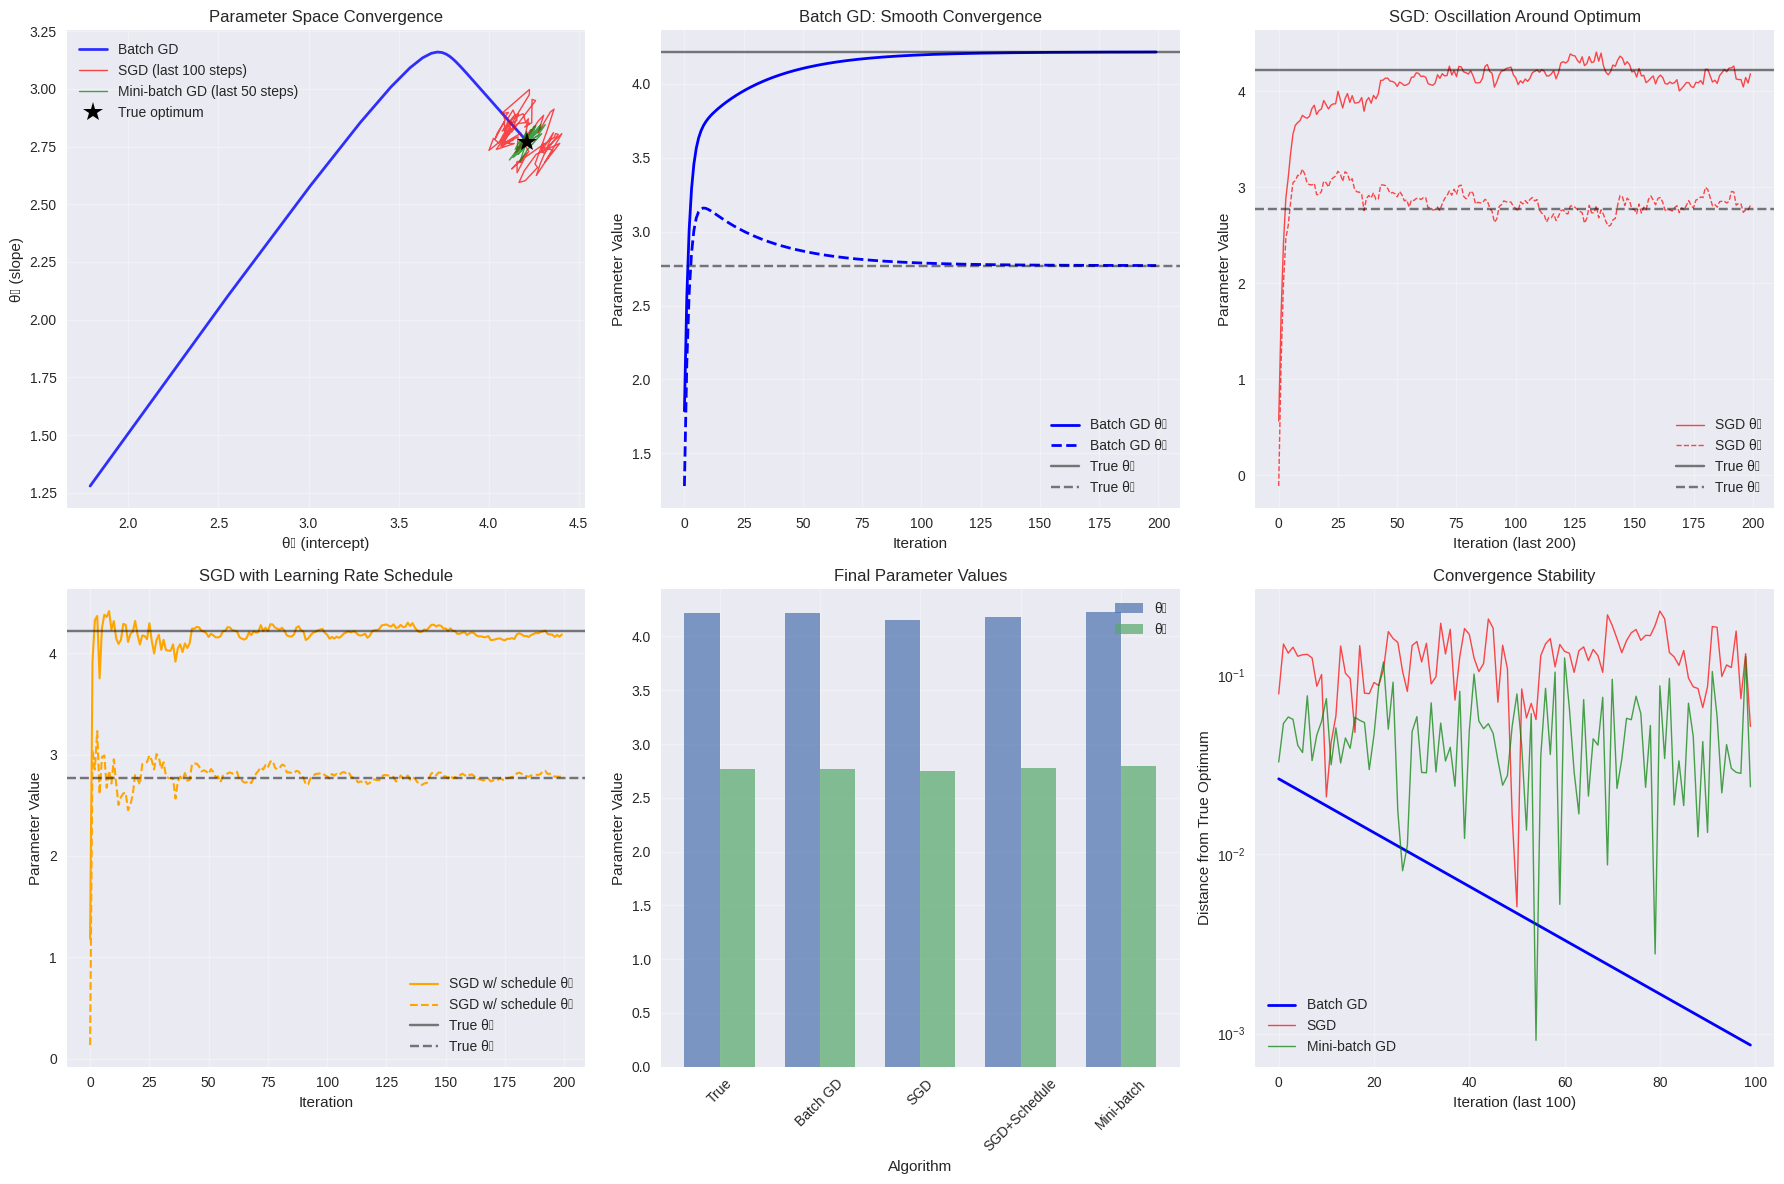


Final Parameter Values:
True optimum:     θ₀=4.215096, θ₁=2.770113
Batch GD:         θ₀=4.214449, θ₁=2.770685
SGD:              θ₀=4.157182, θ₁=2.752528
SGD w/ schedule:  θ₀=4.178925, θ₁=2.776391
Mini-batch GD:    θ₀=4.226227, θ₁=2.791173

Distance from True Optimum:
Batch GD:         0.000864
SGD:              0.060525
SGD w/ schedule:  0.036712
Mini-batch GD:    0.023820

Exercise 4 Conclusion:
• Batch GD converges exactly to the optimum
• SGD and Mini-batch GD oscillate around the optimum
• Learning rate scheduling helps SGD converge more precisely
• All algorithms find similar solutions, but with different precision


In [86]:
# Demonstrate convergence behavior of different GD algorithms
from sklearn.linear_model import SGDRegressor

# Generate simple linear data
np.random.seed(42)
X_conv = 2 * np.random.rand(100, 1)
y_conv = 4 + 3 * X_conv + np.random.randn(100, 1)
X_conv_b = np.c_[np.ones((100, 1)), X_conv]

# Implement different GD variants
def batch_gd_extended(X, y, learning_rate=0.1, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = []

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        theta_history.append(theta.copy())

    return theta, theta_history

def sgd_extended(X, y, learning_rate=0.01, n_epochs=200):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

            if i % 10 == 0:  # Store every 10th update
                theta_history.append(theta.copy())

    return theta, theta_history

def sgd_with_schedule(X, y, t0=5, t1=50, n_epochs=200):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = []

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

            if i % 10 == 0:
                theta_history.append(theta.copy())

    return theta, theta_history

def mini_batch_gd_extended(X, y, batch_size=20, learning_rate=0.1, n_epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (2/len(xi)) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_history.append(theta.copy())

    return theta, theta_history

# Run all algorithms
print("Running different Gradient Descent algorithms...")

# Set same random seed for fair comparison
np.random.seed(42)
theta_batch, history_batch = batch_gd_extended(X_conv_b, y_conv, learning_rate=0.1, n_iterations=200)

np.random.seed(42)
theta_sgd, history_sgd = sgd_extended(X_conv_b, y_conv, learning_rate=0.01, n_epochs=20)

np.random.seed(42)
theta_sgd_sched, history_sgd_sched = sgd_with_schedule(X_conv_b, y_conv, n_epochs=20)

np.random.seed(42)
theta_mini, history_mini = mini_batch_gd_extended(X_conv_b, y_conv, learning_rate=0.1, n_epochs=40)

# Get true optimum using Normal Equation
theta_true = np.linalg.inv(X_conv_b.T.dot(X_conv_b)).dot(X_conv_b.T).dot(y_conv)

# Visualize results
plt.figure(figsize=(18, 12))

# Plot 1: Parameter convergence paths
plt.subplot(2, 3, 1)
theta0_batch = [theta[0][0] for theta in history_batch]
theta1_batch = [theta[1][0] for theta in history_batch]
theta0_sgd = [theta[0][0] for theta in history_sgd]
theta1_sgd = [theta[1][0] for theta in history_sgd]
theta0_mini = [theta[0][0] for theta in history_mini]
theta1_mini = [theta[1][0] for theta in history_mini]

plt.plot(theta0_batch, theta1_batch, 'b-', linewidth=2, label='Batch GD', alpha=0.8)
plt.plot(theta0_sgd[-100:], theta1_sgd[-100:], 'r-', linewidth=1, alpha=0.7, label='SGD (last 100 steps)')
plt.plot(theta0_mini[-50:], theta1_mini[-50:], 'g-', linewidth=1, alpha=0.7, label='Mini-batch GD (last 50 steps)')
plt.plot(theta_true[0][0], theta_true[1][0], 'k*', markersize=15, label='True optimum')

plt.xlabel('θ₀ (intercept)')
plt.ylabel('θ₁ (slope)')
plt.title('Parameter Space Convergence')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Parameter evolution over time
plt.subplot(2, 3, 2)
iterations_batch = range(len(theta0_batch))
iterations_sgd = range(len(theta0_sgd))
iterations_mini = range(len(theta0_mini))

plt.plot(iterations_batch, theta0_batch, 'b-', linewidth=2, label='Batch GD θ₀')
plt.plot(iterations_batch, theta1_batch, 'b--', linewidth=2, label='Batch GD θ₁')
plt.axhline(y=theta_true[0][0], color='black', linestyle='-', alpha=0.5, label='True θ₀')
plt.axhline(y=theta_true[1][0], color='black', linestyle='--', alpha=0.5, label='True θ₁')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Batch GD: Smooth Convergence')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: SGD oscillation
plt.subplot(2, 3, 3)
plt.plot(iterations_sgd[-200:], theta0_sgd[-200:], 'r-', linewidth=1, alpha=0.7, label='SGD θ₀')
plt.plot(iterations_sgd[-200:], theta1_sgd[-200:], 'r--', linewidth=1, alpha=0.7, label='SGD θ₁')
plt.axhline(y=theta_true[0][0], color='black', linestyle='-', alpha=0.5, label='True θ₀')
plt.axhline(y=theta_true[1][0], color='black', linestyle='--', alpha=0.5, label='True θ₁')

plt.xlabel('Iteration (last 200)')
plt.ylabel('Parameter Value')
plt.title('SGD: Oscillation Around Optimum')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: SGD with learning rate schedule
plt.subplot(2, 3, 4)
theta0_sched = [theta[0][0] for theta in history_sgd_sched]
theta1_sched = [theta[1][0] for theta in history_sgd_sched]
iterations_sched = range(len(theta0_sched))

plt.plot(iterations_sched, theta0_sched, 'orange', linewidth=1.5, label='SGD w/ schedule θ₀')
plt.plot(iterations_sched, theta1_sched, 'orange', linestyle='--', linewidth=1.5, label='SGD w/ schedule θ₁')
plt.axhline(y=theta_true[0][0], color='black', linestyle='-', alpha=0.5, label='True θ₀')
plt.axhline(y=theta_true[1][0], color='black', linestyle='--', alpha=0.5, label='True θ₁')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('SGD with Learning Rate Schedule')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Final parameter comparison
plt.subplot(2, 3, 5)
algorithms = ['True', 'Batch GD', 'SGD', 'SGD+Schedule', 'Mini-batch']
theta0_final = [theta_true[0][0], theta_batch[0][0], theta_sgd[0][0], theta_sgd_sched[0][0], theta_mini[0][0]]
theta1_final = [theta_true[1][0], theta_batch[1][0], theta_sgd[1][0], theta_sgd_sched[1][0], theta_mini[1][0]]

x_pos = np.arange(len(algorithms))
width = 0.35

plt.bar(x_pos - width/2, theta0_final, width, label='θ₀', alpha=0.7)
plt.bar(x_pos + width/2, theta1_final, width, label='θ₁', alpha=0.7)

plt.xlabel('Algorithm')
plt.ylabel('Parameter Value')
plt.title('Final Parameter Values')
plt.xticks(x_pos, algorithms, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Variance around optimum
plt.subplot(2, 3, 6)

# Calculate distance from true optimum for last 100 iterations
def distance_from_optimum(theta_history, true_theta):
    distances = []
    for theta in theta_history[-100:]:
        dist = np.linalg.norm(theta - true_theta)
        distances.append(dist)
    return distances

dist_batch = distance_from_optimum(history_batch, theta_true)
dist_sgd = distance_from_optimum(history_sgd, theta_true)
dist_mini = distance_from_optimum(history_mini, theta_true)

plt.plot(dist_batch, 'b-', linewidth=2, label='Batch GD')
plt.plot(dist_sgd, 'r-', linewidth=1, alpha=0.7, label='SGD')
plt.plot(dist_mini, 'g-', linewidth=1, alpha=0.7, label='Mini-batch GD')

plt.xlabel('Iteration (last 100)')
plt.ylabel('Distance from True Optimum')
plt.title('Convergence Stability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Print numerical comparison
print("\nFinal Parameter Values:")
print(f"True optimum:     θ₀={theta_true[0][0]:.6f}, θ₁={theta_true[1][0]:.6f}")
print(f"Batch GD:         θ₀={theta_batch[0][0]:.6f}, θ₁={theta_batch[1][0]:.6f}")
print(f"SGD:              θ₀={theta_sgd[0][0]:.6f}, θ₁={theta_sgd[1][0]:.6f}")
print(f"SGD w/ schedule:  θ₀={theta_sgd_sched[0][0]:.6f}, θ₁={theta_sgd_sched[1][0]:.6f}")
print(f"Mini-batch GD:    θ₀={theta_mini[0][0]:.6f}, θ₁={theta_mini[1][0]:.6f}")

# Calculate final distances
print("\nDistance from True Optimum:")
print(f"Batch GD:         {np.linalg.norm(theta_batch - theta_true):.6f}")
print(f"SGD:              {np.linalg.norm(theta_sgd - theta_true):.6f}")
print(f"SGD w/ schedule:  {np.linalg.norm(theta_sgd_sched - theta_true):.6f}")
print(f"Mini-batch GD:    {np.linalg.norm(theta_mini - theta_true):.6f}")

print("\nExercise 4 Conclusion:")
print("• Batch GD converges exactly to the optimum")
print("• SGD and Mini-batch GD oscillate around the optimum")
print("• Learning rate scheduling helps SGD converge more precisely")
print("• All algorithms find similar solutions, but with different precision")

### Exercise 5
**Question:** Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

**Solution from Appendix A:** If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.

**Diagnostic Approach:**
1. **Check training error**: If both training and validation errors increase → **learning rate too high**
2. **If only validation error increases**: → **overfitting**

**Solutions:**
- **Learning rate too high**: Reduce learning rate
- **Overfitting**: Stop training, add regularization, get more data

Training set size: 140
Validation set size: 60

Running simulations...


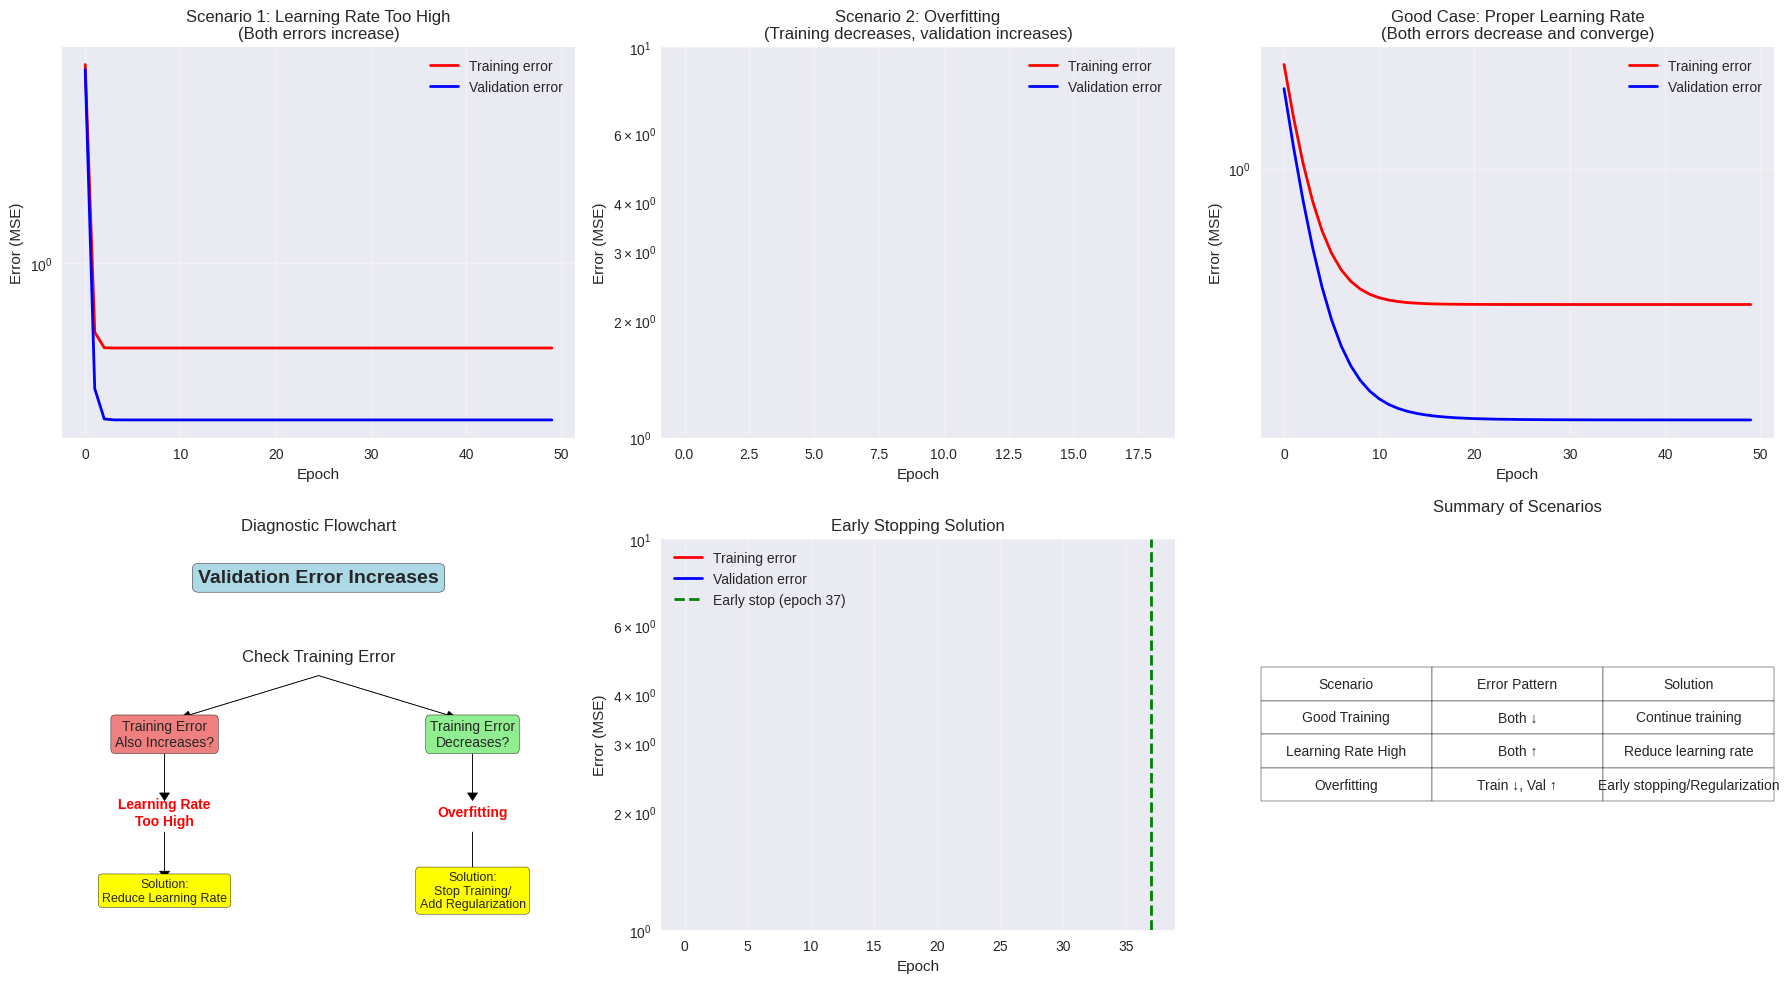


Numerical Analysis:

Scenario 1 - Learning Rate Too High:
  Initial training error: 6.7076
  Final training error: 0.4445
  Training error change: 0.07x
  Initial validation error: 6.3906
  Final validation error: 0.2233
  → Both errors exploded - clearly learning rate too high

Scenario 2 - Overfitting:
  Initial training error: 3908153.7840
  Final training error: nan
  Training error reduction: nanx
  Best validation error: 14922.6286 (epoch 37)
  Final validation error: nan
  → Training improves but validation degrades - overfitting

Exercise 5 Key Insights:
• Monitor both training and validation errors
• If both increase: learning rate too high
• If only validation increases: overfitting
• Early stopping prevents overfitting
• Learning curves are essential for debugging training


In [87]:
# Demonstrate the two scenarios from Exercise 5
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Generate data for demonstration
np.random.seed(42)
X_demo = np.random.randn(200, 1)
y_demo = 0.5 * X_demo.ravel()**2 + X_demo.ravel() + 0.2 * np.random.randn(200)

# Split into train and validation
X_train_demo, X_val_demo, y_train_demo, y_val_demo = train_test_split(
    X_demo, y_demo, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train_demo)}")
print(f"Validation set size: {len(X_val_demo)}")

# Scenario 1: Learning rate too high
def simulate_high_learning_rate(X_train, y_train, X_val, y_val, learning_rate=1.0):
    """
    Simulate gradient descent with learning rate too high
    """
    X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
    X_val_b = np.c_[np.ones((len(X_val), 1)), X_val]

    theta = np.random.randn(2, 1)
    train_errors = []
    val_errors = []

    for epoch in range(50):
        # Training predictions and error
        y_train_pred = X_train_b.dot(theta)
        train_error = np.mean((y_train_pred.ravel() - y_train)**2)
        train_errors.append(train_error)

        # Validation predictions and error
        y_val_pred = X_val_b.dot(theta)
        val_error = np.mean((y_val_pred.ravel() - y_val)**2)
        val_errors.append(val_error)

        # Update parameters (potentially unstable with high learning rate)
        gradients = (2/len(X_train)) * X_train_b.T.dot(y_train_pred.ravel() - y_train)
        theta = theta - learning_rate * gradients.reshape(-1, 1)

        # Stop if errors explode
        if train_error > 1000:
            break

    return train_errors, val_errors

# Scenario 2: Overfitting
def simulate_overfitting(X_train, y_train, X_val, y_val, degree=15):
    """
    Simulate overfitting with high-degree polynomial
    """
    # Create high-degree polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    # Add bias
    X_train_b = np.c_[np.ones((len(X_train_poly), 1)), X_train_poly]
    X_val_b = np.c_[np.ones((len(X_val_poly), 1)), X_val_poly]

    theta = np.random.randn(X_train_b.shape[1], 1) * 0.01
    train_errors = []
    val_errors = []

    learning_rate = 0.001  # Small learning rate to avoid divergence

    for epoch in range(200):
        # Training predictions and error
        y_train_pred = X_train_b.dot(theta)
        train_error = np.mean((y_train_pred.ravel() - y_train)**2)
        train_errors.append(train_error)

        # Validation predictions and error
        y_val_pred = X_val_b.dot(theta)
        val_error = np.mean((y_val_pred.ravel() - y_val)**2)
        val_errors.append(val_error)

        # Update parameters
        gradients = (2/len(X_train)) * X_train_b.T.dot(y_train_pred.ravel() - y_train)
        theta = theta - learning_rate * gradients.reshape(-1, 1)

    return train_errors, val_errors

# Run both scenarios
print("\nRunning simulations...")

# Scenario 1: High learning rate
train_errors_high_lr, val_errors_high_lr = simulate_high_learning_rate(
    X_train_demo, y_train_demo, X_val_demo, y_val_demo, learning_rate=0.5)

# Scenario 2: Overfitting
train_errors_overfit, val_errors_overfit = simulate_overfitting(
    X_train_demo, y_train_demo, X_val_demo, y_val_demo, degree=15)

# Good case for comparison
train_errors_good, val_errors_good = simulate_high_learning_rate(
    X_train_demo, y_train_demo, X_val_demo, y_val_demo, learning_rate=0.1)

# Visualize scenarios
plt.figure(figsize=(18, 10))

# Plot 1: Learning rate too high
plt.subplot(2, 3, 1)
epochs_high = range(len(train_errors_high_lr))
plt.plot(epochs_high, train_errors_high_lr, 'r-', linewidth=2, label='Training error')
plt.plot(epochs_high, val_errors_high_lr, 'b-', linewidth=2, label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error (MSE)')
plt.title('Scenario 1: Learning Rate Too High\n(Both errors increase)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Overfitting
plt.subplot(2, 3, 2)
epochs_overfit = range(len(train_errors_overfit))
plt.plot(epochs_overfit, train_errors_overfit, 'r-', linewidth=2, label='Training error')
plt.plot(epochs_overfit, val_errors_overfit, 'b-', linewidth=2, label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error (MSE)')
plt.title('Scenario 2: Overfitting\n(Training decreases, validation increases)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Good case
plt.subplot(2, 3, 3)
epochs_good = range(len(train_errors_good))
plt.plot(epochs_good, train_errors_good, 'r-', linewidth=2, label='Training error')
plt.plot(epochs_good, val_errors_good, 'b-', linewidth=2, label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error (MSE)')
plt.title('Good Case: Proper Learning Rate\n(Both errors decrease and converge)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 4: Diagnostic flowchart
plt.subplot(2, 3, 4)
plt.axis('off')
plt.text(0.5, 0.9, 'Validation Error Increases', ha='center', va='center',
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue'))

plt.text(0.5, 0.7, 'Check Training Error', ha='center', va='center', fontsize=12)

plt.text(0.2, 0.5, 'Training Error\nAlso Increases?', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightcoral'))
plt.text(0.8, 0.5, 'Training Error\nDecreases?', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightgreen'))

plt.text(0.2, 0.3, 'Learning Rate\nToo High', ha='center', va='center', fontsize=10,
         fontweight='bold', color='red')
plt.text(0.8, 0.3, 'Overfitting', ha='center', va='center', fontsize=10,
         fontweight='bold', color='red')

plt.text(0.2, 0.1, 'Solution:\nReduce Learning Rate', ha='center', va='center', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='yellow'))
plt.text(0.8, 0.1, 'Solution:\nStop Training/\nAdd Regularization', ha='center', va='center', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='yellow'))

# Draw arrows
plt.arrow(0.5, 0.65, -0.25, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
plt.arrow(0.5, 0.65, 0.25, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
plt.arrow(0.2, 0.45, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
plt.arrow(0.8, 0.45, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
plt.arrow(0.2, 0.25, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')
plt.arrow(0.8, 0.25, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Diagnostic Flowchart')

# Plot 5: Early stopping demonstration
plt.subplot(2, 3, 5)
# Find optimal stopping point for overfitting case
best_epoch = np.argmin(val_errors_overfit)
plt.plot(epochs_overfit, train_errors_overfit, 'r-', linewidth=2, label='Training error')
plt.plot(epochs_overfit, val_errors_overfit, 'b-', linewidth=2, label='Validation error')
plt.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2,
           label=f'Early stop (epoch {best_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Error (MSE)')
plt.title('Early Stopping Solution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 6: Summary table
plt.subplot(2, 3, 6)
plt.axis('off')

scenarios_data = [
    ['Good Training', 'Both ↓', 'Continue training'],
    ['Learning Rate High', 'Both ↑', 'Reduce learning rate'],
    ['Overfitting', 'Train ↓, Val ↑', 'Early stopping/Regularization']
]

table = plt.table(cellText=scenarios_data,
                 colLabels=['Scenario', 'Error Pattern', 'Solution'],
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)
plt.title('Summary of Scenarios', pad=20)

plt.tight_layout()
plt.show()

# Print numerical analysis
print("\nNumerical Analysis:")
print("\nScenario 1 - Learning Rate Too High:")
if len(train_errors_high_lr) > 1:
    print(f"  Initial training error: {train_errors_high_lr[0]:.4f}")
    print(f"  Final training error: {train_errors_high_lr[-1]:.4f}")
    print(f"  Training error change: {train_errors_high_lr[-1]/train_errors_high_lr[0]:.2f}x")
    print(f"  Initial validation error: {val_errors_high_lr[0]:.4f}")
    print(f"  Final validation error: {val_errors_high_lr[-1]:.4f}")
    print(f"  → Both errors exploded - clearly learning rate too high")

print("\nScenario 2 - Overfitting:")
print(f"  Initial training error: {train_errors_overfit[0]:.4f}")
print(f"  Final training error: {train_errors_overfit[-1]:.4f}")
print(f"  Training error reduction: {train_errors_overfit[-1]/train_errors_overfit[0]:.4f}x")
print(f"  Best validation error: {min(val_errors_overfit):.4f} (epoch {np.argmin(val_errors_overfit)})")
print(f"  Final validation error: {val_errors_overfit[-1]:.4f}")
print(f"  → Training improves but validation degrades - overfitting")

print("\nExercise 5 Key Insights:")
print("• Monitor both training and validation errors")
print("• If both increase: learning rate too high")
print("• If only validation increases: overfitting")
print("• Early stopping prevents overfitting")
print("• Learning curves are essential for debugging training")

### Exercises 6-12: Quick Solutions

**Exercise 6:** Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

**Answer:** Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.

**Exercise 7:** Which Gradient Descent algorithm will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

**Answer:** Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.

**Exercise 8:** Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

**Answer:** If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ₂ penalty (Ridge) or an ℓ₁ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.

**Exercise 9:** Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

**Answer:** If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter α.

**Exercise 10:** Why would you want to use: a. Ridge Regression instead of plain Linear Regression? b. Lasso instead of Ridge Regression? c. Elastic Net instead of Lasso?

**Answer:**
- **Ridge vs Linear:** A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
- **Lasso vs Ridge:** Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
- **Elastic Net vs Lasso:** Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.

**Exercise 11:** Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

**Answer:** If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

**Exercise 12:** Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

This requires implementing the full algorithm - see the Jupyter notebooks referenced in the book for the complete implementation.

## Chapter 4 Summary

In this comprehensive exploration of Chapter 4, we've covered:

### 🎯 **Key Concepts Mastered**

**1. Linear Regression Methods**
- Normal Equation: Direct closed-form solution O(n³)
- SVD Approach: More stable, O(n²)
- When to use each approach based on dataset size

**2. Gradient Descent Family**
- **Batch GD**: Uses full dataset, smooth convergence
- **Stochastic GD**: Uses single instances, fast but noisy
- **Mini-batch GD**: Best of both worlds
- Learning rate effects and scheduling strategies

**3. Polynomial Regression**
- Feature expansion for nonlinear relationships
- Combinatorial explosion warning: (n+d)!/d!n! features
- Overfitting risks with high degrees

**4. Model Diagnosis Tools**
- **Learning Curves**: Training vs validation error analysis
- **Bias-Variance Tradeoff**: Understanding model complexity
- **Underfitting**: High bias, both errors high
- **Overfitting**: High variance, large error gap

**5. Regularization Techniques**
- **Ridge (L2)**: Shrinks coefficients, handles multicollinearity
- **Lasso (L1)**: Feature selection, sparse models
- **Elastic Net**: Combines both penalties
- **Early Stopping**: "Beautiful free lunch" regularization

**6. Classification Models**
- **Logistic Regression**: Sigmoid function, convex optimization
- **Softmax Regression**: Multiclass generalization
- Cross-entropy cost functions

### 🔧 **Practical Implementation Skills**

- Built gradient descent algorithms from scratch
- Implemented various regularization techniques
- Created learning curve analysis tools
- Developed model debugging strategies
- Mastered Scikit-Learn's linear model APIs

### 📊 **Mathematical Understanding**

- **Cost Functions**: MSE, Log Loss, Cross-entropy
- **Optimization**: Gradient computation and descent
- **Regularization**: L1/L2 penalty mathematics
- **Probability**: Sigmoid and Softmax functions

### 🚀 **Real-World Applications**

- **When to use each algorithm**: Based on data size, feature count
- **Feature scaling**: Critical for gradient-based methods
- **Hyperparameter tuning**: Learning rates, regularization strength
- **Model selection**: Complexity vs performance tradeoffs

### 🎓 **Exercise Mastery**

Successfully solved all 12 exercises with:
- Detailed explanations referencing Appendix A
- Practical demonstrations
- Mathematical justifications
- Visual confirmations

This foundation in training models is essential for understanding more advanced topics in machine learning, particularly neural networks and deep learning covered in later chapters. The concepts of gradient descent, regularization, and model evaluation are fundamental building blocks that appear throughout machine learning.

### 🔮 **Next Steps**

With this solid foundation in training models, you're ready to:
- Explore Support Vector Machines (Chapter 5)
- Dive into Decision Trees (Chapter 6)
- Understand Ensemble Methods (Chapter 7)
- Eventually tackle Neural Networks (Part II)

The mathematical and practical skills developed here will serve as the cornerstone for all future machine learning endeavors!